# BITCOIN PRICE FORECASTING PROJECT
## TIME SERIES APPROACH

Author : By Hera K.


This project aims to forecast future bitcoin price based on historical bitcoin price data by time series approach. In time series analysis, time is a crucial variable of the data, because it shows us how the data adjusts over the course of the data points as well as the result.


## This analysis is NOT an investment advice!

# Introduction

This project is created through a combination of the skills I have learned in the Data Science program at Flatiron School. 
Time series is a specific way of analyzing a sequence. It can show likely changes in the data, like seasonality or cyclic behavior, which provides a better understanding of data variables and helps forecast better. 


# Business Problem

To come up with a long-lasting solution, the world needs innovative and robust perspective for global system. Increasing demand worldwide makes Bitcoin much more attractive, though it looks like untrusty and jeopardous venture for now. Bitcoin prices are tried to be predicted by investors or majority. Bitcoin is aspiring critical up-and-coming for future as it ensures an analytical, favorable, strategic system emerging in digitalized world. To forecast bitcoin future prices helps to be enabled to plan for investment wisely.

# Data 

Columns in our dataframe is mentioned as below.It operates 24 hours a day nonstop.

* **Date** : Index in our time series that specifies the date associated with the price. (USD)

* **Open Price**: The first price of BTC was purchased on the trading day (USD)

* **Close Price**: The last price of BTC was purchased at the end of trading day (USD)

* **High:** The maximum price of BTC was purchased on trading day (USD)

* **Low:** The minimum price of BTC was purchased on the trading day (USD)

* **Adjusted Closing Price**: Stock exchanges witness buying and selling of millions of shares every minute. When the exchanges close, the last trading price of the stock is recorded as the closing price of the share (USD)

* **Volume**: The sum of actual trades made during the trading day (USD)

- All Time High $68,789.63 USD   in 2021-11-10
- Max Volume 350,967,941.479 USD in 2021-02-26

In [2]:
# Data manipulation 
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

# Modeling & Forecasting
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
# Read the data from csv file
df = pd.read_csv('BTC-USD.csv',
                index_col = 'Date', parse_dates=True)

# Rename the columns 
df = df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume':'volume'})
df

,open,high,low,close,Adj Close,volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,28680.537109,16432924527
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594,19122972518


# Data Cleaning

Check the below information during EDA

* Drop the irrelavant or duplicated columns
* Display the first 3 columns 
* Display the last 3 columns
* Display the information of df 
* Display if there is duplicated columns
* Display if there is the missing (null data)

In [4]:
# Check the columns are same as each other
display(df[df['close'] == df['Adj Close']].shape, df.shape)

# Drop the same columns 
df = df.drop(columns=['Adj Close'], axis=1, inplace=False)

# Display first 3 columns of head, last 3 columns of tail
display(df.head(3), df.tail(3))
display(df.info())

(3153, 6)

(3153, 6)

,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700


,open,high,low,close,volume
Date,,,,,
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,19122972518
2023-05-04,29031.304688,29353.185547,28694.039063,28847.710938,15548678514
2023-05-05,28855.175781,29659.476563,28848.173828,29495.498047,17805907968


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3153 entries, 2014-09-17 to 2023-05-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3153 non-null   float64
 1   high    3153 non-null   float64
 2   low     3153 non-null   float64
 3   close   3153 non-null   float64
 4   volume  3153 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 147.8 KB


None

* **I have date as datetime from 2014 to 2023 years, open, high, low and close columns as float, volume as integer in our dataframe.
I have 3153 entries and total 5 columns.**

* **I will focus on historical close price for my forecasting models to predict future BTC price. It is daily prices on the dataset.** 

In [5]:
# Check duplicated columns 
display(df.duplicated().sum())

# Check how many missing info, null in the dataframe
display(df.isnull().sum())

0

open      0
high      0
low       0
close     0
volume    0
dtype: int64

* It looks there is no duplicated and null info, I have clean dataframe
* Let's see my df shape total entries, maximum value, unique values for per column on my below cell.

In [6]:
# Check our df shape and total entries
print(f"There are {df.shape[0]} entries in our timeseries")

# The idxmax() method returns a Series with the index of the maximum value for each column
print(f'Maximum value for each column:\n{df.idxmax(axis=0, skipna=True)}')

# Max numbers per each column
print("Open     number of max    : {}".format(df['open'].max()))
print("Close    number of max    : {}".format(df['close'].max()))
print("High     number of max    : {}".format(df['high'].max()))
print("Low      number of max    : {}".format(df['low'].max()))
print("Volume   number of max    : {}".format(df['volume'].max()))

# Check the unique per each column
print("Open     number of unique : {}".format(df['open'].nunique()))
print("Close    number of unique : {}".format(df['close'].nunique()))
print("High     number of unique : {}".format(df['high'].nunique()))
print("Low      number of unique : {}".format(df['low'].nunique()))
print("Volume   number of unique : {}".format(df['volume'].nunique()))

There are 3153 entries in our timeseries
Maximum value for each column:
open     2021-11-09
high     2021-11-10
low      2021-11-09
close    2021-11-08
volume   2021-02-26
dtype: datetime64[ns]
Open     number of max    : 67549.734375
Close    number of max    : 67566.828125
High     number of max    : 68789.625
Low      number of max    : 66382.0625
Volume   number of max    : 350967941479
Open     number of unique : 3149
Close    number of unique : 3150
High     number of unique : 3150
Low      number of unique : 3152
Volume   number of unique : 3153


# Data Visualization

* I visualize the data to grab much more clear observation.

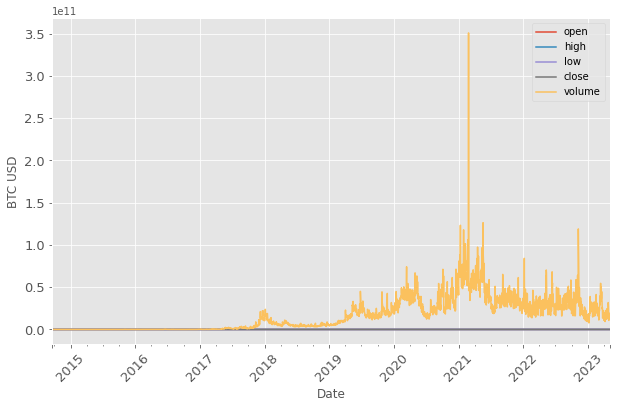

In [10]:
# All columns in dataframe 
df.plot(ylabel= 'BTC USD', fontsize= 13, figsize=(10, 6))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Volume BTC.png", transparent = True, dpi=150)
plt.show()

* Above graph shows Volume distribution in my data. There is an extreme peak in 2021. It looks some outliers after 2021 clearly.

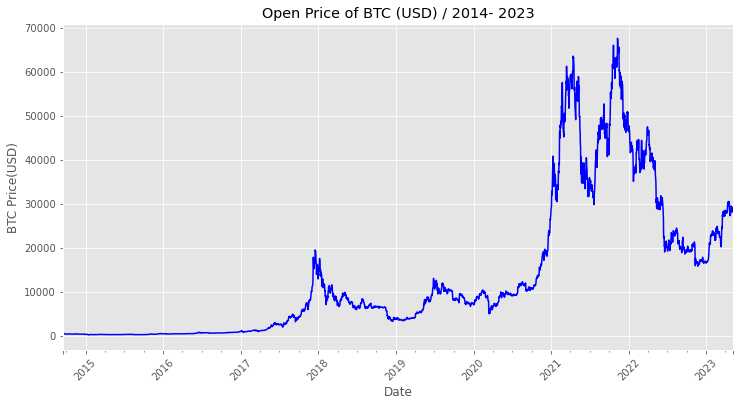

In [13]:
# Open price of Bitcoin from 2014 to 2023

df['open'].plot(ylabel='BTC Price(USD)', title='Open Price of BTC (USD) / 2014- 2023', figsize=(12, 6), color='blue')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Open Price BTC.png", transparent = True, dpi=150)
plt.show()

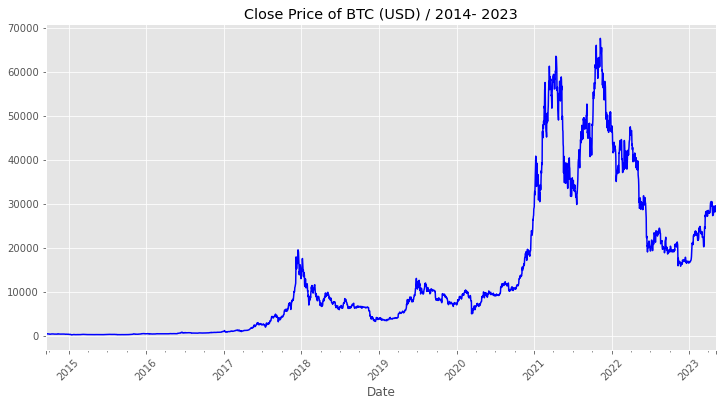

In [14]:
# Close price of Bitcoin from 2014 to 2023

df['close'].plot(y='BTC Price(USD)', title='Close Price of BTC (USD) / 2014- 2023', figsize=(12, 6), color='blue')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Close Price BTC.png", transparent = True, dpi=150)
plt.show()

* As seen above Open Price and Close Price graphs,it displays that both they are not stationary, has a clear trend. I can tell lots of random fluctuations seen on that graph.

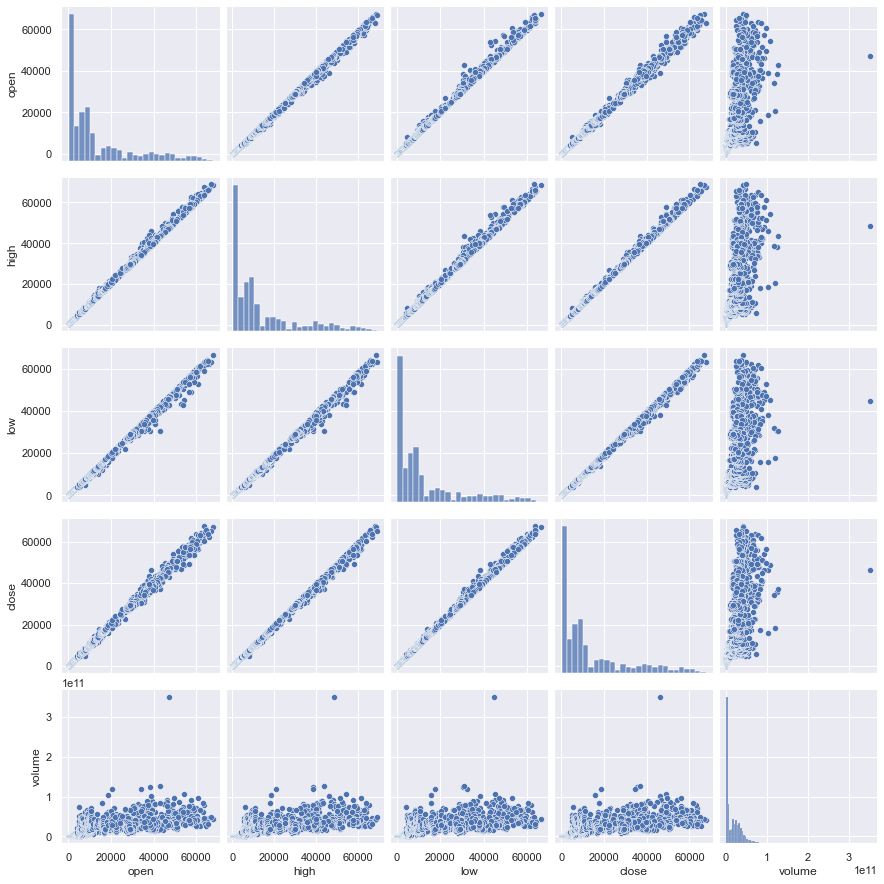

In [15]:
# Check correlation among all columns 

sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(data=df)

* As seen above plot shows that all straight lines, all these prices are incredibely positive correlated with each other. High price is really correlated with the open price, low price is really correlated the open price, close price is really correlated the open price.


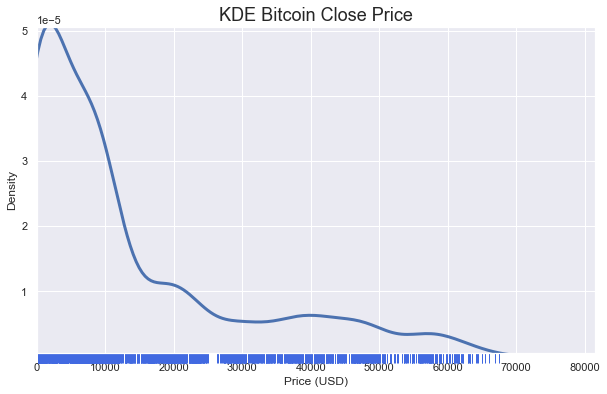

In [16]:
# Density of close price
# KDE distribution of Bitcoin closing price

fig, ax = plt.subplots(figsize=(10, 6))
p = sns.kdeplot(data=df, x='close', linewidth=3, ax=ax)
r = sns.rugplot(data=df, x='close', ax=ax, c='royalblue',
                height=-.03, clip_on=False)

#Save the figure
#plt.savefig("KDE BTC Close Price.png", transparent = True, dpi=150)

p.set(xlim=(0, None))
p.set_title('KDE Bitcoin Close Price', fontsize=18)
p.set_xlabel('Price (USD)');

* As seen above graph, there is no symmetry of the data distribution. Density curve is right skewed. If a density curve is right skewed, then the mean is greater than the median.

<AxesSubplot:title={'center':'Comparing The Percentage Change of Open Price- Close Price'}, xlabel='Date'>

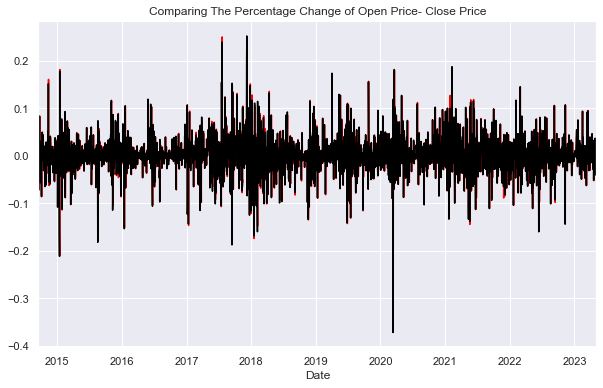

In [17]:
#Volatility
# The percentage increase both open and close price 
# daily return, changing of open price 
# changing of close price

df['open_change'] = (df['open']/df['open'].shift(1)) -1
df['close_change'] = (df['close']/df['close'].shift(1)) -1

df['open_change'].plot(title = 'Comparing The Percentage Change of Open Price- Close Price', color='red', figsize = (10, 6))
df['close_change'].plot(color='black')

#Save the figure
#plt.savefig("Compare % change Open-Close Price.png", transparent = True, dpi=150)

* As seen above graph, open_change, close change results overlaps extremely. It seems heteroskedastic nature. It looks many outliers clearly general of data.

<AxesSubplot:title={'center':'Daily Open-Close (Return) Price'}, xlabel='Date'>

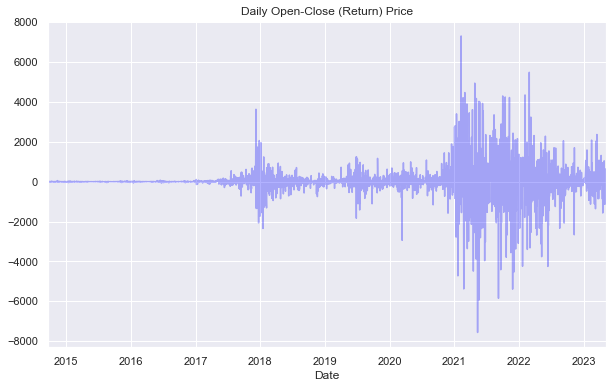

In [18]:
# Daily open close (return) price

df['profit'] = (df['close'] - df['open'])                
df['profit'].plot(title = 'Daily Open-Close (Return) Price', alpha = 0.3, color='blue', figsize = (10,6))

#Save the figure
#plt.savefig("Daily Open-Close Price.png", transparent = True, dpi=150)

* As seen above graph, profit seems heteroskedastic nature. It looks some outliers clearly after 2021.

<AxesSubplot:xlabel='Date', ylabel='BTC USD'>

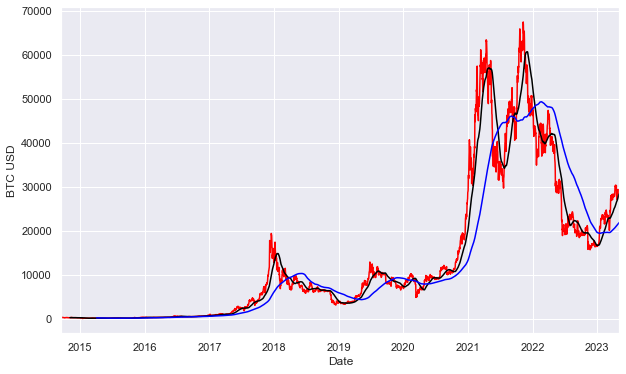

In [19]:
# Check any trend or pattern we can take the help of a 50-day 200-day average
# https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/
# Bu siteye mutlaka bak bunun uzerinde calis 

df['MA50'] = df['close'].rolling(50).mean()
df['MA200'] = df['close'].rolling(200).mean()

df['close'].plot(ylabel= 'BTC USD', color='red', figsize = (10,6))
df['MA50'].plot(color='black')
df['MA200'].plot(color='blue')

#Save the figure
#plt.savefig("50-day 200-day Avg-Trend.png", transparent = True, dpi=150)

# Future Columns

In [20]:
# I create new columns for future 
# open-change
# close-change
# open-close = Daily return price
# MA50 = Any trend 50-day average
# MA200 = Any trend 50-day average
print(df.shape)
print(df.head())

(3153, 10)
                  open        high         low       close    volume  \
Date                                                                   
2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

            open_change  close_change     profit  MA50  MA200  
Date                                                           
2014-09-17          NaN           NaN  -8.529999   NaN    NaN  
2014-09-18    -0.019328     -0.071926 -32.419983   NaN    NaN  
2014-09-19    -0.071700     -0.069843 -29.307007   NaN    NaN  
2014-09-20    -0.069394      0.035735  14.230988   NaN    NaN  
2014-09-21     0.033983     -0.024659  -9.263977   NaN    NaN  


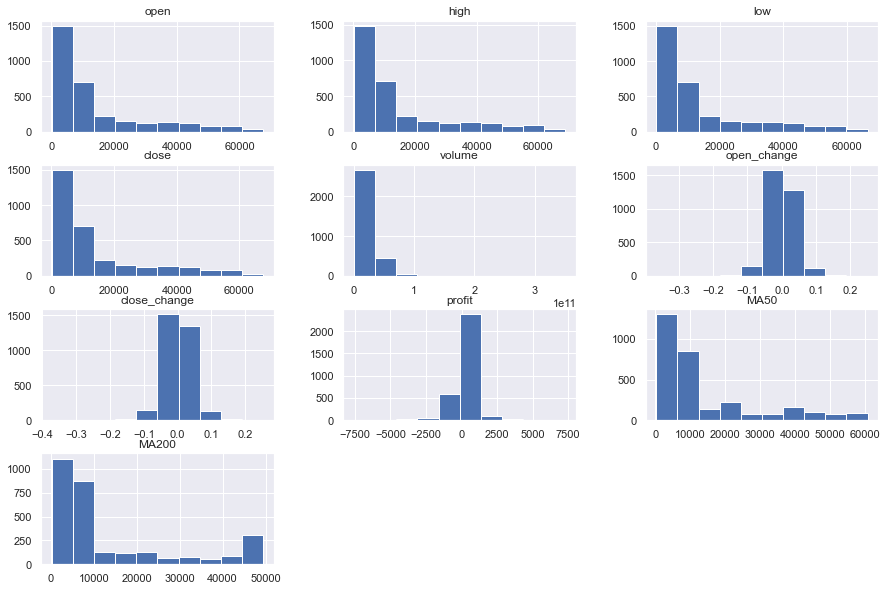

In [21]:
# Checking for normality for all columns including feature columns (for stat testing)

df.hist(xlabelsize= 11, ylabelsize= 11, figsize=(15, 10))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Normality All Columns.png", transparent = True, dpi=150)
plt.show()

Skewness is an asymmetry in the distribution of data as it does not show any kind of symmetry in continuous data.
* Open-change, close-change, profit columns look like close normal distribution whereas open, close, high, low, volume, MA50, MA200 columns are Right-Skewed data. That means they are not normal distributed. 

> For Right-Skewed data the Mean > Median > Mode.

> For Left-Skewed data the Mode > Median > Mean.

Most of the statistical models do not work when the data is skewed. Because the tail region of the skewed data distributions are the outliers in the data and outliers can severely damage the performance of a statistical model.

The normal distribution is with no skewness like 'Bell-Curve, with no skewness for data such as the Mean = Median = Mode.I should fix it to get best model performance. 

In [22]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03',
               '2023-05-04', '2023-05-05'],
              dtype='datetime64[ns]', name='Date', length=3153, freq=None)

# Check Stationary
* I will use daily close price of Bitcoin for prediction, I don't need to resample it because it's already daily price

* I will check the stationary as measuring p value thanks to the Dickey Fuller test. 

* If p value is less than alpha my data is stationary. If not I will use differencing to make it stationary.

In [23]:
# Create close_ts, close column with datetime
close_ts = df['close']
close_ts

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2023-05-01    28091.568359
2023-05-02    28680.537109
2023-05-03    29006.308594
2023-05-04    28847.710938
2023-05-05    29495.498047
Name: close, Length: 3153, dtype: float64

In [24]:
# Check p value of our close_ts and check if it is stationary

# 1. Test Statistic, 
# 2. p-value, 
# 3. #Lags Used,
# 4. Number of Observations Used
# 5. Critical values
# Check the train 1st differencing stationary
dftest = adfuller(close_ts, autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

if dftest[1] < 0.05:
    print("Data is stationary.")
else:
    print("Data is \
NOT stationary.")

1. ADF         :  -1.5336037381203826
2. P-Value     :  0.5168274345848825
3. Num Of Lags :  29
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3123
5. Critical Values :
	 1% :  -3.432445639802861
	 5% :  -2.8624659237441654
	 10% :  -2.567262891276225
Data is NOT stationary.


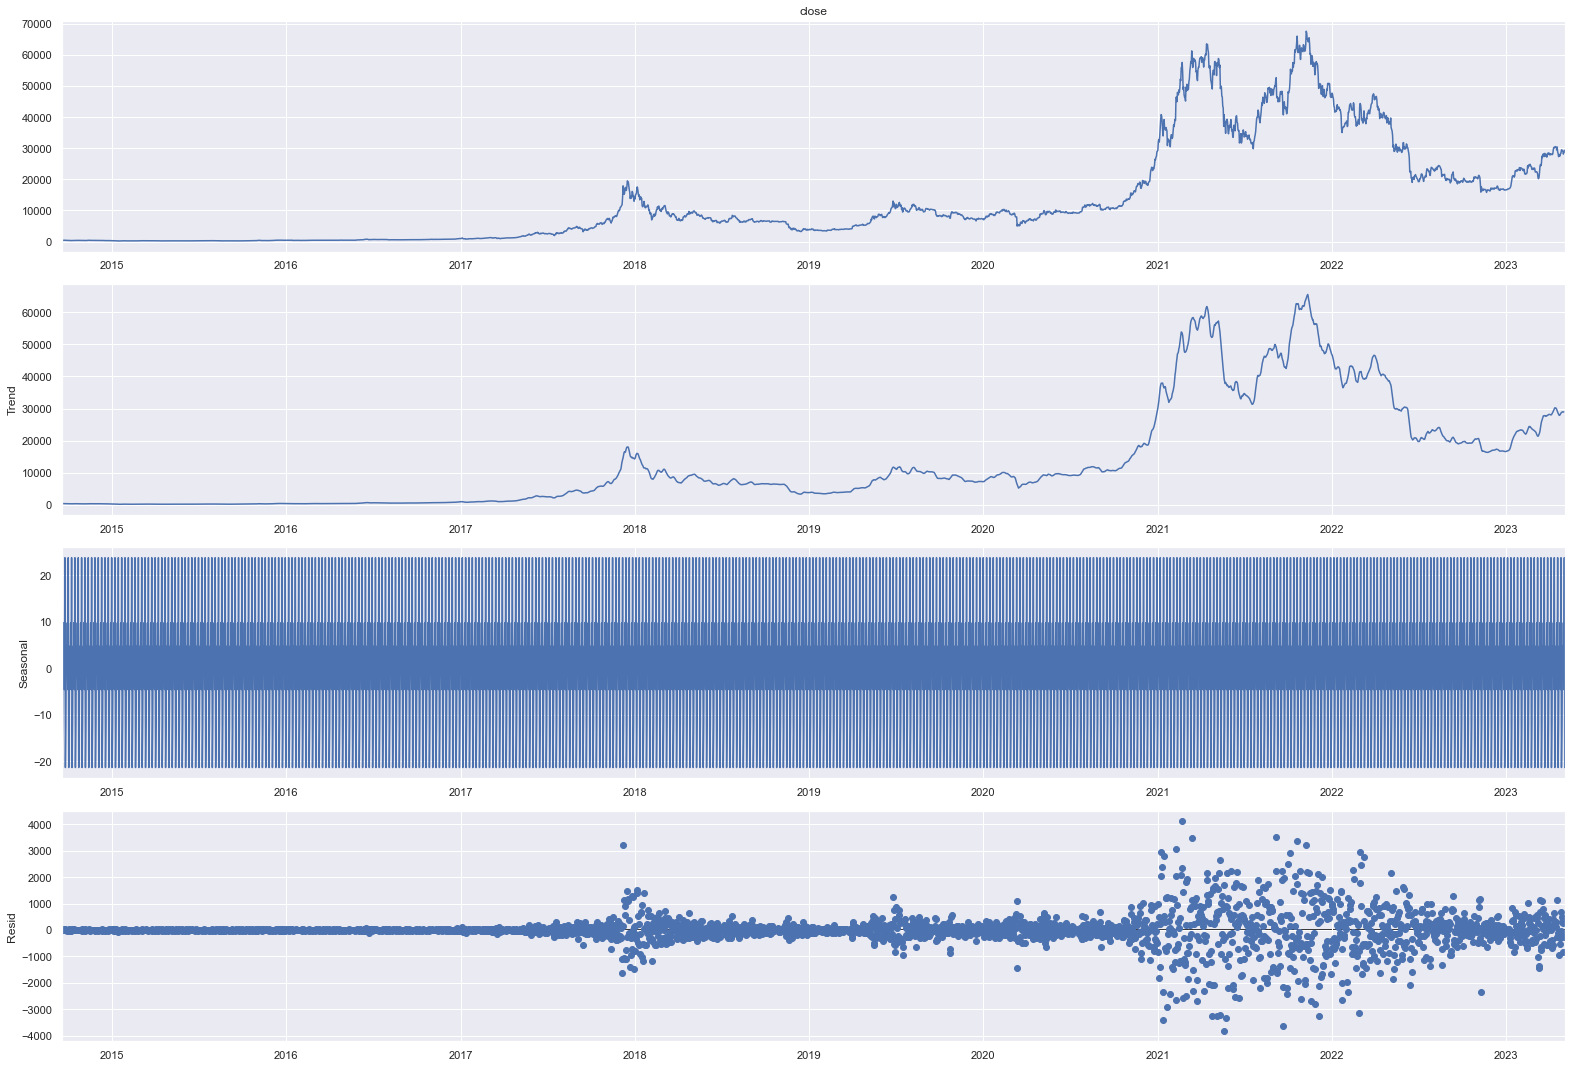

In [26]:
# Check the daily decomposition of my daily closing price time series
# Trend
# Seasonality
# Noise

from pylab import rcParams
rcParams['figure.figsize'] = 22, 15
decomp_daily = seasonal_decompose(close_ts, model='additive')
fig = decomp_daily.plot()

#Save the figure
plt.savefig("Decomposition Daily BTC.png", transparent = True, dpi=150)
plt.show()

<AxesSubplot:xlabel='Date'>

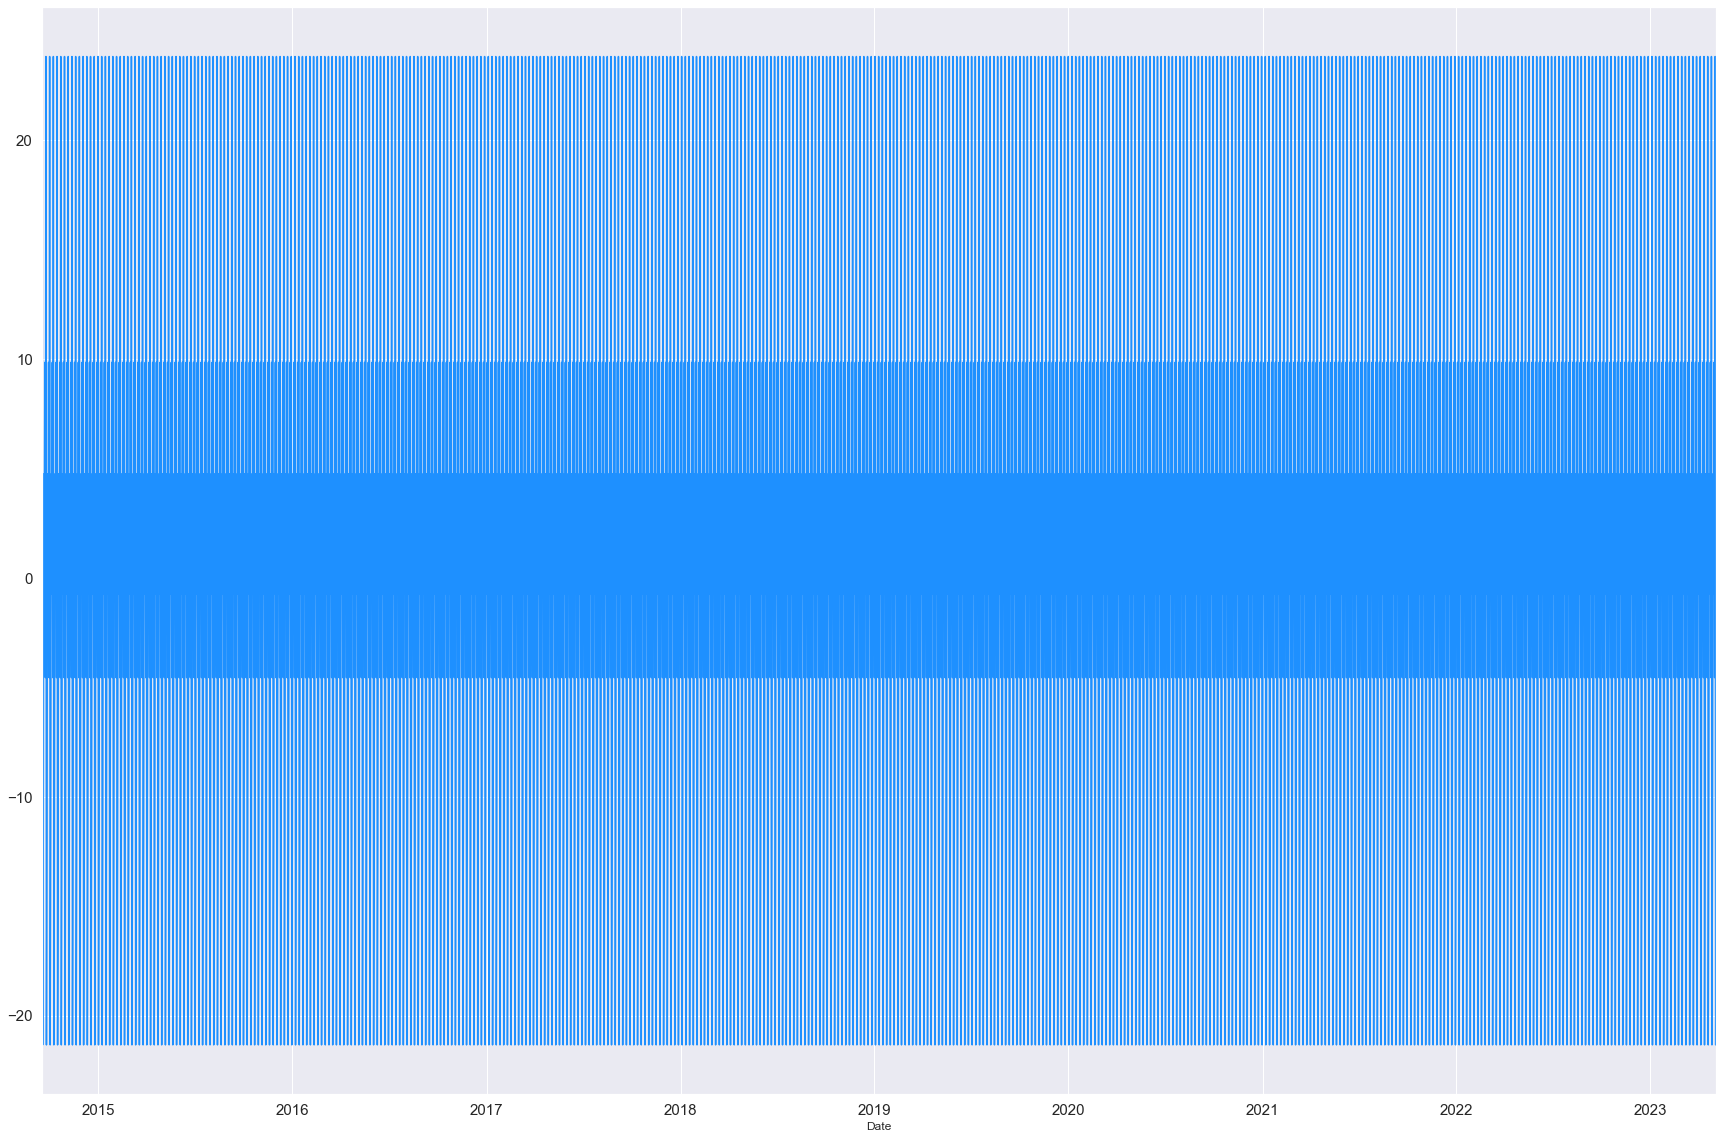

In [27]:
# I have extracted the seasonality from the time series

seasonality=decomp_daily.seasonal
seasonality.plot(fontsize= 15, color='dodgerblue', figsize=(30, 20))

It is difficult to interpret the seasonal decomposition, thus it is not clear. It is obviously seen non-stationary data. I should check monthly decomposition more interpretable result.
* Stationary time series is a time series that is unaffected by these four components. 
* ARIMA model is useful in the cases where the time series is non-stationary. And the differencing is required to make the time series stationary.I require a stationary time series to perform forecasting using the ARIMA model.


# Make Daily Close Price Stationary

* Open price and close price are very close each other. I will continue with closing price for prediction
* I should take a first difference of the data to remove this autocorrelation.
* Visualize the ACF and PACF to visual the differenced data

In [28]:
# Create transformation, difference the data
close_diff = close_ts.diff().dropna()

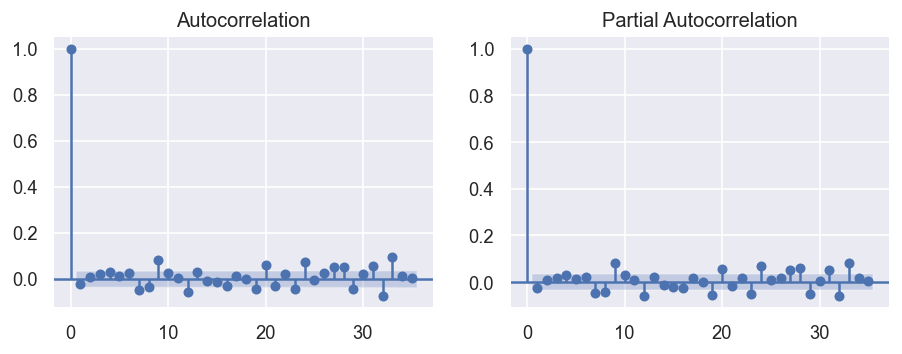

In [29]:
# Check ACF and PACF graphs to decide p and q parameters
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

# ACF, Decide for AR, p
plot_acf(close_diff, title='Autocorrelation', ax=axes[0]);

# PACF, Decide for MA term, q
plot_pacf(close_diff, title='Partial Autocorrelation', ax=axes[1]);

#Save the figure
#plt.savefig("ACF & PACF.png", transparent = True, dpi=150)

In [30]:
# Check p value of our close_ts and check if it is stationary
# 1. Test Statistic, 2. p-value, 3. #Lags Used, 4. Number of Observations Used, 5. Critical values
dftest = adfuller(close_diff.dropna(), autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

if dftest[1] < 0.05:
    print("Differenced data is STATIONARY.")
else:
    print("Differenced data is \
NOT stationary.")

1. ADF         :  -9.356284064249085
2. P-Value     :  8.043183725372062e-16
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3123
5. Critical Values :
	 1% :  -3.432445639802861
	 5% :  -2.8624659237441654
	 10% :  -2.567262891276225
Differenced data is STATIONARY.


* According to the Dickey Fuller test result differenced close time series is stationary. I don't have to 2.nd differencing it. 
* I can use my d term =1, because 1.st differenced data is stationary.

# METHODS & MODELS

# 1. Basic Naive Model

* The naïve approach is an estimating technique in which the last period's actuals are used as this period's forecast, without adjusting them or attempting to establish causal factors. It is used only for comparison with the forecasts generated by the better (sophisticated) techniques. Because it concerns what happened in the previous period and predicts the same thing will happen.

In [31]:
# Train Test split 
train_len = 2693
train = df[0:train_len] # first 2693 days as train set
test = df[train_len:]   # 460 days as test set

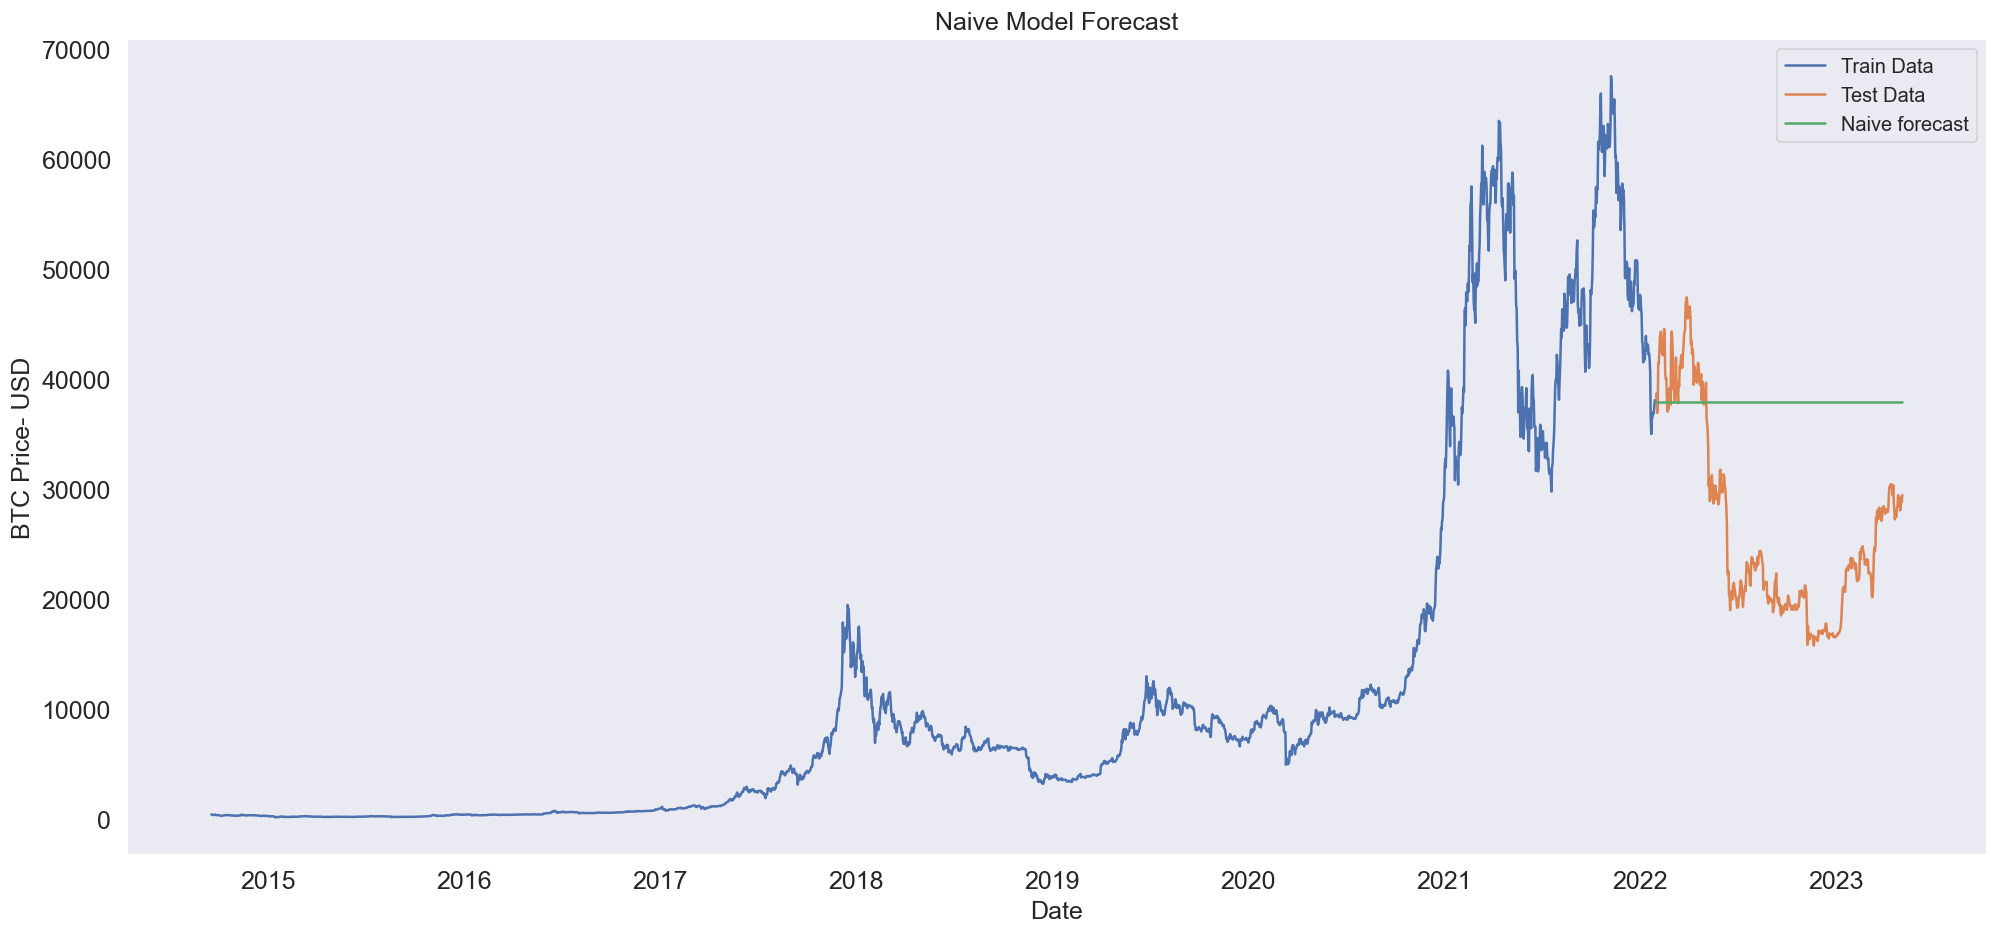

In [32]:
pred_naive = test.copy()
pred_naive['naive_forecast'] = train['close'][train_len-1]

plt.figure(figsize=(20,9))
plt.grid()
plt.plot(train['close'], label='Train Data')
plt.plot(test['close'], label='Test Data')
plt.plot(pred_naive.index, pred_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Model Forecast', fontsize=15)

# Labels
plt.ylabel('BTC Price- USD', fontsize=15)
plt.xlabel('Date', fontsize=15)

# Sub labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=12);
plt.show()


In [34]:
# Root mean squared error
rmse_test = np.sqrt(mean_squared_error(test['close'], pred_naive['naive_forecast'])).round(2)
print('RMSE - Test error :', rmse_test)

RMSE - Test error : 14429.4


* The naïve model forecast graph is displayed above, it is a bad prediction to interpret. As seen above graph, Naive method isn’t suited for datasets with high variability. I have extreme high RMSE score and  This naive model uses the actual observed prices from the last period as the forecast for the next period, without considering any predictions or factor adjustments.

* I should try different methods and parameters for better prediction.

# Train Test Split

In [35]:
# Define train and test sets (~85 % train, ~15% test set)

train = close_ts.iloc[:-int(len(close_ts) * 0.146)]
test = close_ts.iloc[-int(len(close_ts) * 0.146):]

print('close_ts length   :', len(close_ts))
print('train data length :', len(train))
print('test data length  :', len(test))

close_ts length   : 3153
train data length : 2693
test data length  : 460


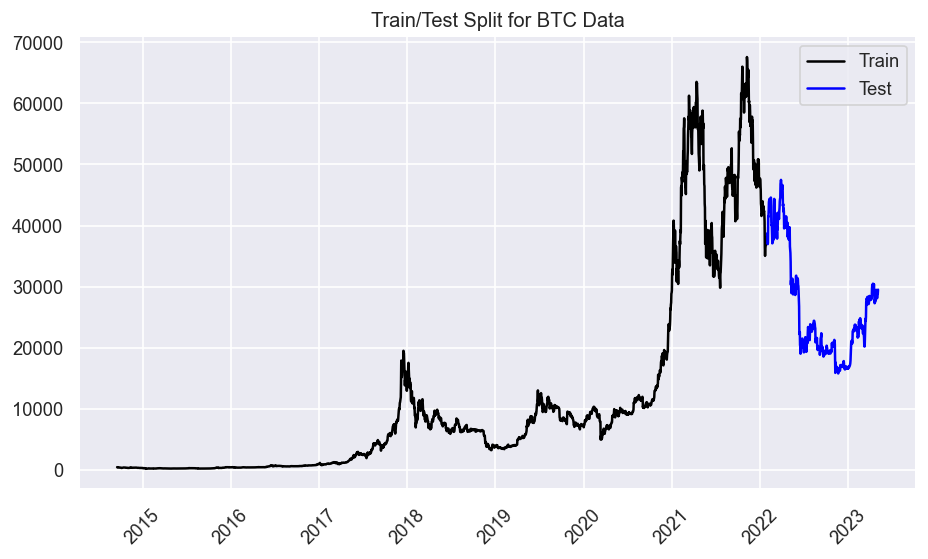

In [36]:
# Visualize the train test split as a graph

fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(train, color = "black", label='Train')
ax.plot(test, color = "blue", label='Test')
ax.set_title("Train/Test Split for BTC Data")

# Rotate x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
#plt.savefig("Train.png", transparent = True, dpi=150)

plt.legend();

In [37]:
# We will now set aside our test set to build our model on the train

split = TimeSeriesSplit()

In [38]:
# Check the train 1st differencing stationary
dftest = adfuller(train.diff().dropna(), autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
    
if dftest[1] < 0.05:
    print("Differenced train data is STATIONARY.")
else:
    print("Differenced train data is \
NOT stationary.")

1. ADF         :  -8.402637439997656
2. P-Value     :  2.2101796620734062e-13
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2663
5. Critical Values :
	 1% :  -3.432807985211508
	 5% :  -2.8626259540301553
	 10% :  -2.5673480904338657
Differenced train data is STATIONARY.


# 2. ARIMA Model Daily Closing Price

* ARIMA model is useful in the cases where the time series is non-stationary. And the differencing is required to make the time series stationary. Most often, it happens when the data is non-stationary the predictions we get from the ARIMA model are worse or not that accurate.

* ARIMA models are denoted with the notation seasonal parameter as wel as ARIMA(p, d, q). 
* These three parameters emphasize seasonality, trend, and noise in data
* The 1st parameter corresponds to the lagging (past values - AR term), 

* The 2nd corresponds to differencing (this is what makes non-stationary data stationary- differencing/ integration order), 
* The 3rd parameter corresponds to the white noise (for modeling shock events- MA term- moving average lags). 



In [39]:
# Instantiate and fit the model
# I have to difference my data, because train is not stationary. This model will not perform well already.
# So I start d=1, no need to try d=0, because I know my train data is non-stationary.

ar_1 = ARIMA(train, order=(1, 1, 1)).fit()
ar_2 = ARIMA(train, order=(3, 1, 3)).fit()
ar_3 = ARIMA(train, order=(10, 1, 10)).fit()


In [40]:
# Prediction train
train_pred_1 = ar_1.predict()
train_pred_2 = ar_2.predict()
train_pred_3 = ar_3.predict()

# Root Mean Squared Error of train data
train_error_1 = np.sqrt(mean_squared_error(train, train_pred_1))
train_error_2 = np.sqrt(mean_squared_error(train, train_pred_2))
train_error_3 = np.sqrt(mean_squared_error(train, train_pred_3))

In [42]:
# Prediction test
pred_1 = ar_1.predict(start = test.index[0], end = test.index[-1])
pred_2 = ar_2.predict(start = test.index[0], end = test.index[-1])
pred_3 = ar_3.predict(start = test.index[0], end = test.index[-1])

In [43]:
print('RMSE - Train error 1 :', train_error_1)
print('RMSE - Train error 2 :', train_error_2)
print('RMSE - Train error 3 :', train_error_3)
print('AIC ar_1:', ar_1.aic)
print('AIC ar_2:', ar_2.aic)
print('AIC ar_3:', ar_3.aic)
print(ar_3.summary())


RMSE - Train error 1 : 765.3359179046199
RMSE - Train error 2 : 761.3306442471871
RMSE - Train error 3 : 748.3204855478656
AIC ar_1: 43397.666473266174
AIC ar_2: 43378.15236339929
AIC ar_3: 43316.61971660863
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2693
Model:               ARIMA(10, 1, 10)   Log Likelihood              -21637.310
Date:                Tue, 30 May 2023   AIC                          43316.620
Time:                        21:47:36   BIC                          43440.479
Sample:                    09-17-2014   HQIC                         43361.418
                         - 01-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

**Interpretation ar_3 model result:**
    
* RMSE  : 748.320485547865
* AIC    : 43316.61971660863

> Both AIC and RMSE train score is very high. 

> Let's plot and see all predictions comparing to my train and test data. Let's score my test RMSE.

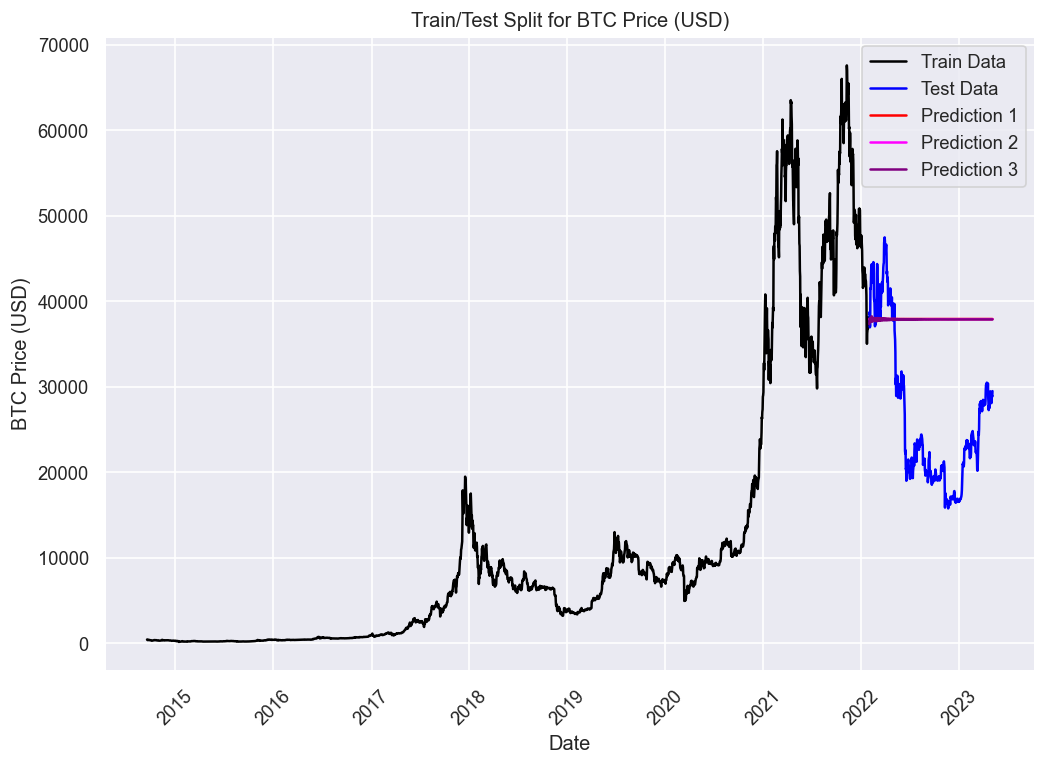

In [44]:
# Visualize the prediction options to see more interpretable 
plt.figure(figsize=(10,7))
plt.plot(train, color = "black",label='Train Data')
plt.plot(test, color = "blue",label='Test Data')
plt.ylabel('BTC Price (USD)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split for BTC Price (USD)")
plt.plot(pred_1, color='red', label = 'Prediction 1')
plt.plot(pred_2, color='magenta', label = 'Prediction 2')
plt.plot(pred_3, color='purple', label = 'Prediction 3')

plt.legend();

# ARIMA Model Forecast Daily Closing Price
* The lowest train error belongs to ar_3 model, 740. It's still high as mentioned above, but it's the lowest among the models.

* I will forecast the BTC price for this model.

In [45]:
# Let's forecast for ar_3 model
pred_3 =ar_3.get_forecast(len(test.index))

## Confidence interval, alpha = 0.05
pred_df = pred_3.conf_int(alpha= .05)

pred_df['Predictions'] = ar_3.predict(start = pred_df.index[0], end = pred_df.index[-1])
pred_df.index = test.index
pred_out = pred_df['Predictions']

test_error = np.sqrt(mean_squared_error(test, pred_out))
output = ar_3.predict(start='2023-05-05',end='2024-12-31')

print('Test RMSE   :', test_error)

Test RMSE   : 14394.902158186165


* Test RMSE   : 14394.902158186165
* Test RMSE is very high. 

> Let's visualize and compare my test prediction, forecast, train and test data as well.

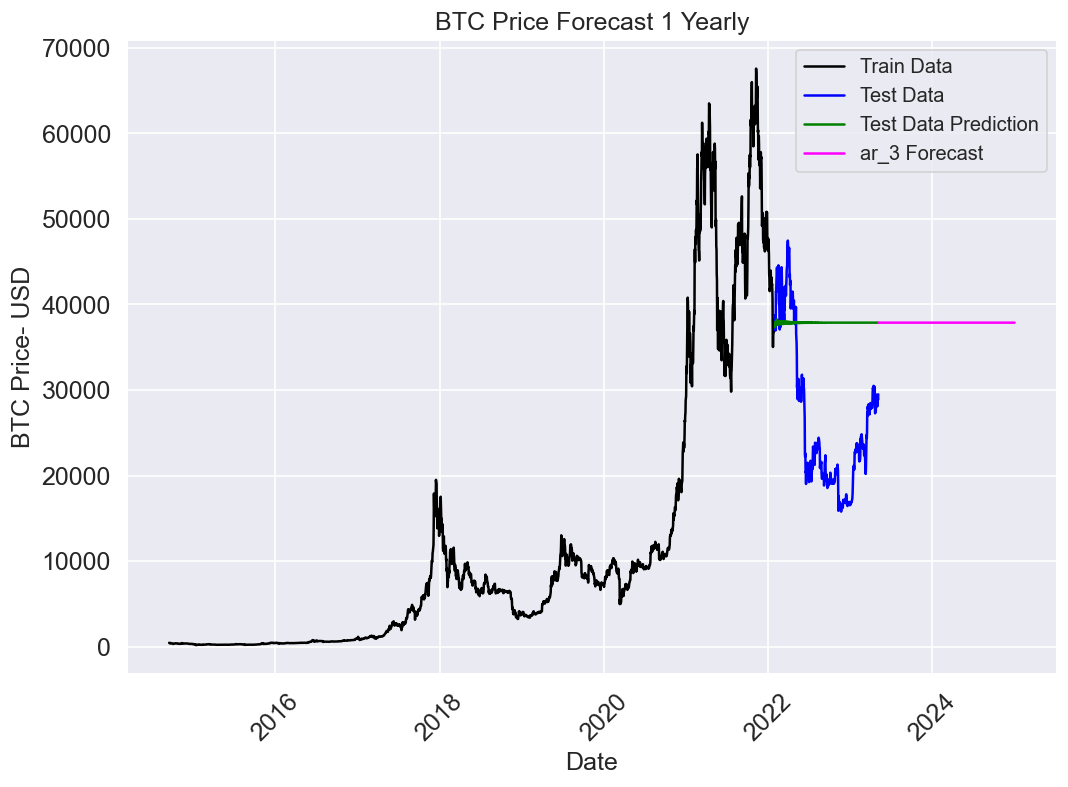

In [46]:
# Visualize forecast ARIMA Model 

plt.figure(figsize=(10,7))
plt.plot(train, color='black', label='Train Data')
plt.plot(test, color='blue', label='Test Data')

# Labels
plt.ylabel('BTC Price- USD', fontsize=15)
plt.xlabel('Date', fontsize=15)

# Sub labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('BTC Price Forecast 1 Yearly', fontsize=15)

plt.plot(pred_out, color= 'green', label= 'Test Data Prediction')
plt.plot(output, color='magenta', label='ar_3 Forecast')

# Rotate x-axis to read easier
plt.xticks(rotation=45)

plt.legend(fontsize=12);


* It is obviously extreme score my test error Test RMSE : 17673.253151608238.
As seen above forecast graph; ARIMA models don't work well for all models. 
It explains that the model is not working well for daily prediction. As seen on the decomposition visualization, there is extreme seasonality. I should deal with it.

* I tried SARIMA model with daily closing price. Its' RMSE is very high and close to with ARIMA model as well. Because it is daily price and does not affect my SARIMA model. I have to change my seasonal effect.


# RESAMPLE CLOSING PRICE MONTHLY
* Decomposition and model results displays that my model is not working for daily price well. I have seasonality and trend. I resample my closing price as Monthly. I will model again as monthly.


In [47]:
# Resample closing price Monthly
close_mts = df['close'].resample('M').mean()
close_mts

Date
2014-09-30      407.182428
2014-10-31      364.148873
2014-11-30      366.099799
2014-12-31      341.267871
2015-01-31      248.782547
                  ...     
2023-01-31    20250.717490
2023-02-28    23304.539202
2023-03-31    25116.900895
2023-04-30    28857.574544
2023-05-31    28824.324609
Freq: M, Name: close, Length: 105, dtype: float64

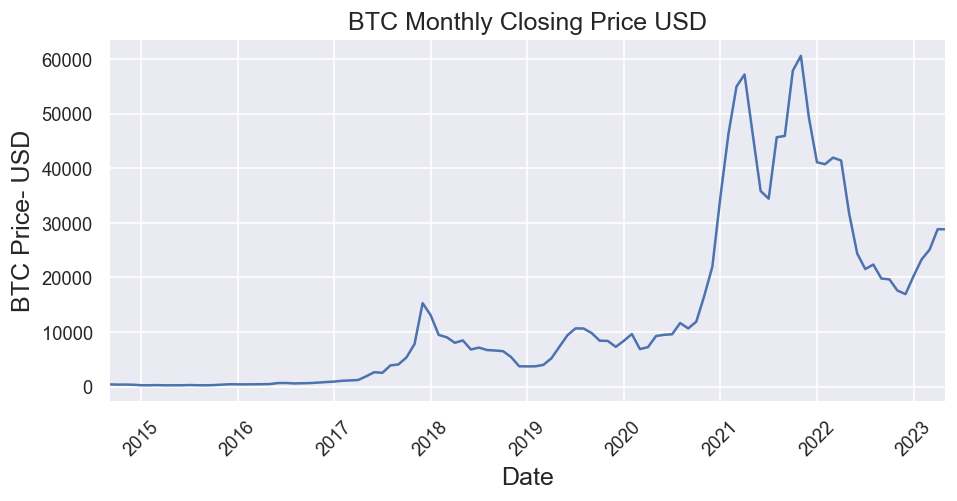

In [48]:
# visualize the monthly closing price time series 
# Graphs shows that BTC price is unstable distinguishly.
close_mts.plot(figsize=(9, 4))

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

# Labels
plt.title('BTC Monthly Closing Price USD', fontsize=15)
plt.ylabel('BTC Price- USD', fontsize=15)
plt.xlabel('Date', fontsize=15)


#Save the figure
plt.savefig("Monthly Closing Price.png", transparent = True, dpi=150)
plt.show()

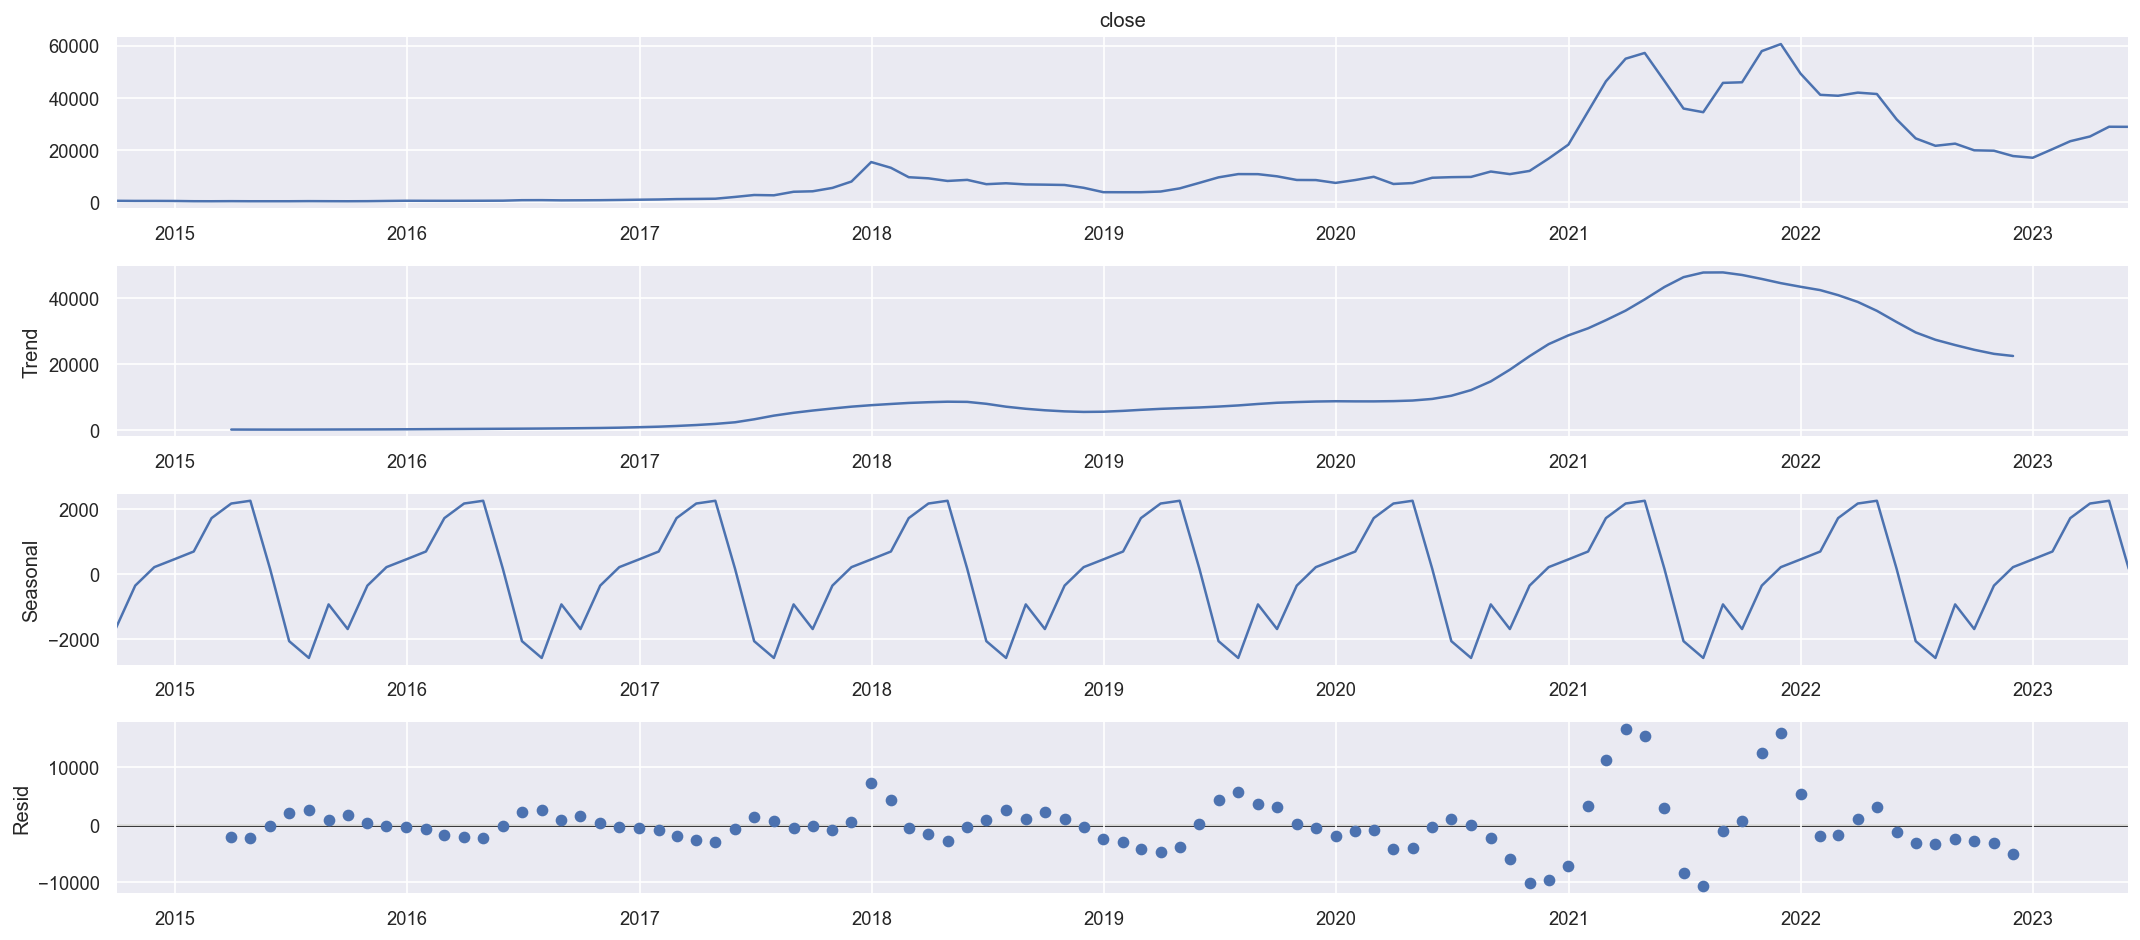

In [49]:
# Decompose my monthly close time series into three distinct components
# Trend
# Seasonality
# Noise

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(close_mts, model='additive')
fig = decomposition.plot()

#Save the figure
plt.savefig("Decomposition Monthly BTC.png", transparent = True, dpi=150)
plt.show()


The above figures explains that the components in order are defined as follows:
An additive model is used here, it suggests that the components are added together as follows:

**Level:** The average value in the series.

**Trend:** The increasing or decreasing value in the series.

**Seasonality:** The repeating short-term cycle in the series.

**Noise:** The random variation in the series.

* I can see that the trend information extracted from the series does seem reasonable. It looks there is less seasonality and cyclic in my data, but obviously trend . The residuals are also showing periods of high variability. There is peak between 2021- 2022 years. 

I also try out a multiplicative model and it shows almost the same results as additive model.

# SARIMAX MODEL

* SARIMAX, Seasonal Autoregressive Integrated Moving Average commonly used as a method for time series forecasting.
* SARIMAX models have same parameters with ARIMA (p,d,q), in addition to that they differentiate with the notation seasonality and eXogenous factors than ARIMA.
* These three parameters are seasonality, trend, and noise in data

### GridSearch for SARIMA parameters
* My data is getting stationary with 1.st differencing. So I will get d=1 
* My data is non-stationary, so I will not use p, d, or q =0, it should be p,d,q != 0 
* So I check the parameter combinations for p and q between 1-4 and d=1 
* Seasonal parameter = 12

In [50]:
# Check p, d and q parameter combinations to take any value between 1 and 4 (4 exluding)
# We will focus on to use 'grid search' to find the optimal set of parameters 

p = d = q = range(1, 4)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 1, 3, 12)
SARIMAX: (1, 1, 3) x (2, 1, 1, 12)
SARIMAX: (1, 1, 3) x (2, 1, 2, 12)


In [51]:
# Let's find the best AIC score and the most optimal parameter combination among them for the best performance model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(close_mts,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1510.3151310490905
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:1068.9209081381118
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:1316.2376906733396
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:2985.2418721344034
ARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:1070.8884503436052
ARIMA(1, 1, 1)x(3, 1, 1, 12)12 - AIC:1089.0367356237775
ARIMA(1, 1, 1)x(3, 1, 2, 12)12 - AIC:2101.1978284321494
ARIMA(1, 1, 1)x(3, 1, 3, 12)12 - AIC:1072.880264468652
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1504.2483687272602
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:1052.2431059321195
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:1318.7092690090278
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:3155.5310818464895
ARIMA(1, 1, 2)x(2, 1, 3, 12)12 - AIC:1054.2330161082689
ARIMA(1, 1, 2)x(3, 1, 1, 12)12 - AIC:1091.3041041434496
ARIMA(1, 1, 2)x(3, 1, 2, 12)12 - AIC:1965.8944678368443
ARIMA(1, 1, 2)x(3, 1, 3, 12)12 - AIC:1056.1859164860787
ARIMA(1, 1, 3)x(1, 1,

I will create SARIMAX model for below parameters. 

* SAR_1 = ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0
    
* SAR_2 = ARIMA(3, 1, 2)x(2, 1, 2, 12)12 - AIC:253.00985753516215
    
* SAR_3 = ARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:1034.0861380207261 

* SAR_4 = ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:1052.2431059321195
    
* SAR_5 = ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:1073.7815701575475

RMSE Train error : 2.0405852507811945e+112
AIC SAR_1 model : 12.0


LinAlgError: singular matrix

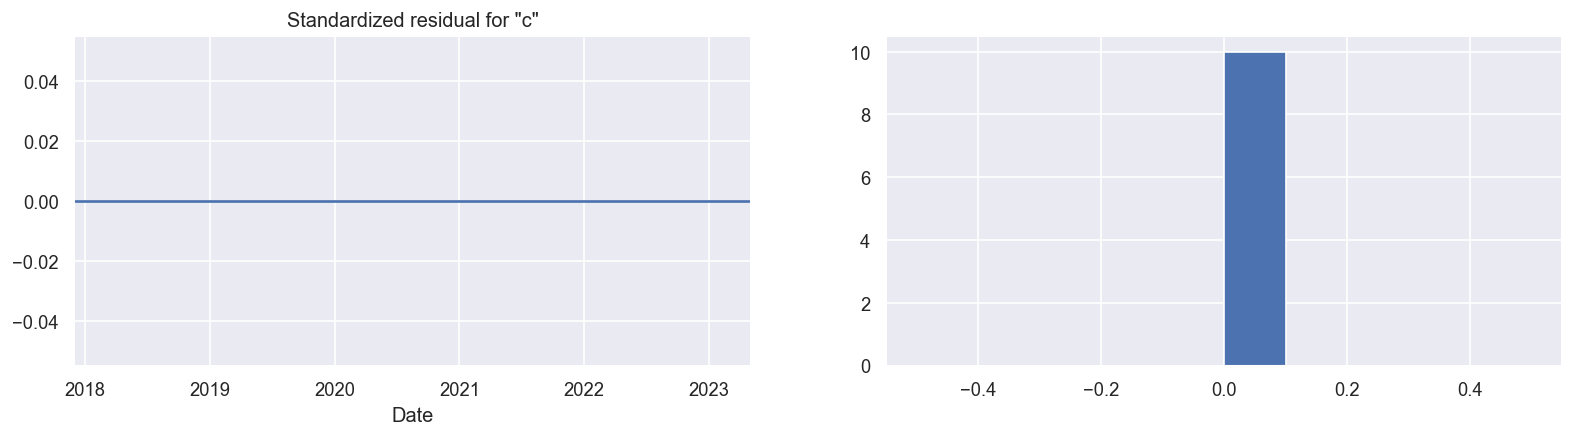

In [53]:
# The lowest AIC, ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0

SAR_1 = SARIMAX(close_mts,
              order=(1, 1, 1),
              seasonal_order=(1, 1, 2, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

# Fit the model
results = SAR_1.fit()

# Let's predict the result SAR_1
pred_SAR_1 = results.predict(typ='levels')

# Check Root Mean Squared Error
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, pred_SAR_1)))

# Check Akaike Information Criteria
print('AIC SAR_1 model :', results.aic)

# Check the prediction errors (residuals) against the predicted values 
# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.

results.plot_diagnostics(figsize=(16, 8))
plt.show()

RMSE Train error : 2.5175027509457365e+26
AIC SAR_1 model : 253.00985753516215


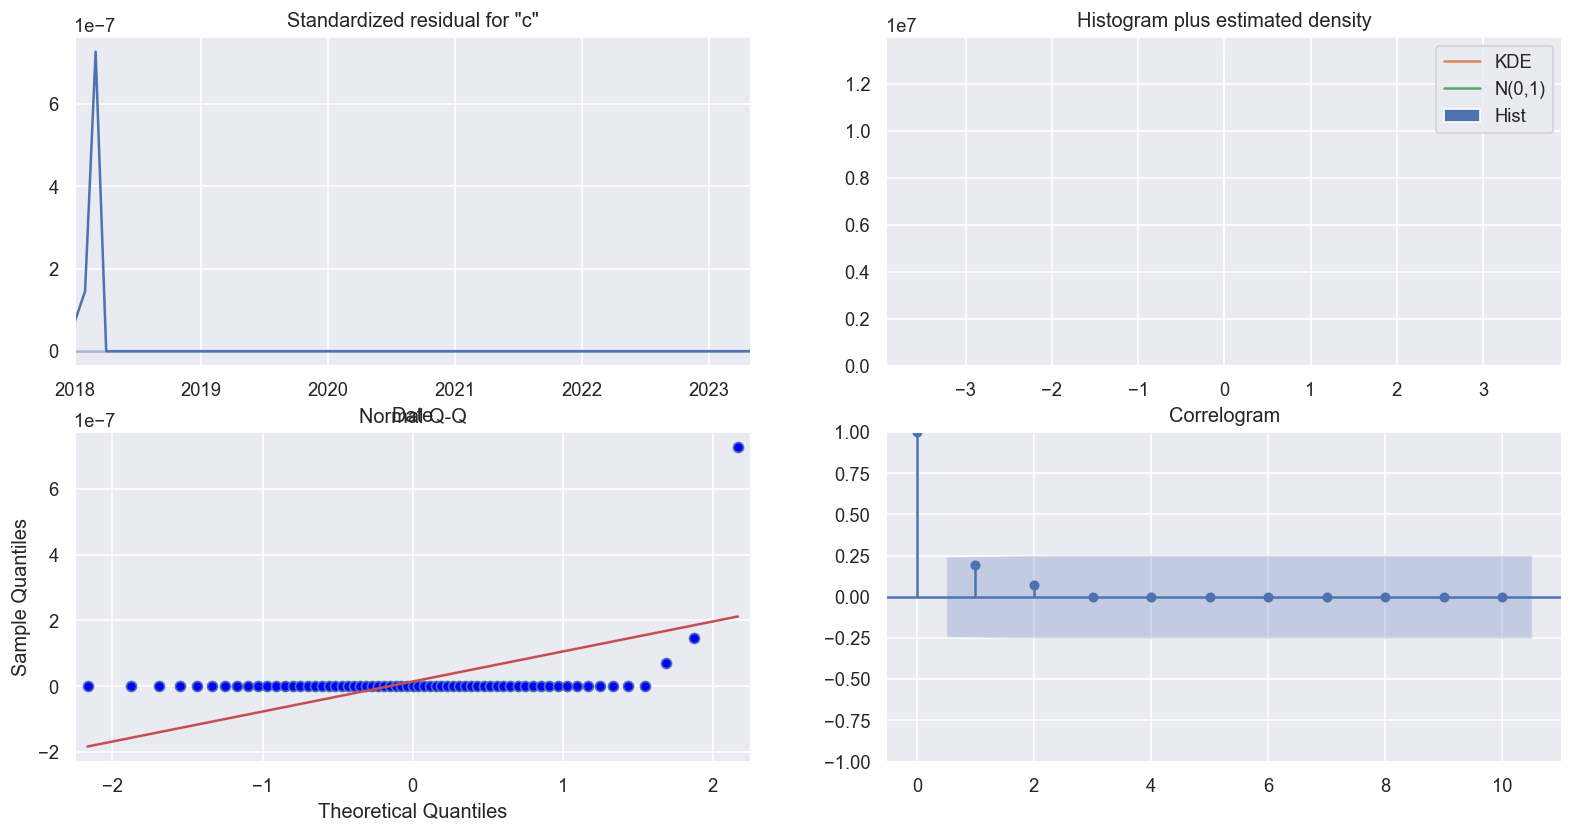

In [54]:
# The lowest ARIMA(3, 1, 2)x(2, 1, 2, 12)12 - AIC:253.00985753516215

SAR_2 = SARIMAX(close_mts,
              order=(3, 1, 2),
              seasonal_order=(2, 1, 2, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

# Fit the model
results = SAR_2.fit()

# Let's predict the model result SAR_2
pred_SAR_2 = results.predict(typ='levels')

# Check Root Mean Squared Error
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, pred_SAR_2)))

# Check Akaike Information Criteria
print('AIC SAR_1 model :', results.aic)

# Check the prediction errors (residuals) against the predicted values
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [55]:
# ARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:1034.0861380207261

SAR_3 = SARIMAX(close_mts,
              order=(2, 1, 3),
              seasonal_order=(1, 1, 3, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

# Fit the model
results = SAR_3.fit()

# Let's predict the model result SAR_3
pred_SAR_3 = results.predict(typ='levels')

# Check Root Mean Squared Error
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, pred_SAR_3)))

# Check Akaike Information Criteria
print('AIC SAR_1 model :', results.aic)

# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

RMSE Train error : 3089.1875358555862
AIC SAR_1 model : 1034.0861380207261


ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1920x960 with 0 Axes>

RMSE Train error : 3150.00820372567
AIC SAR_1 model : 1052.2431059321195


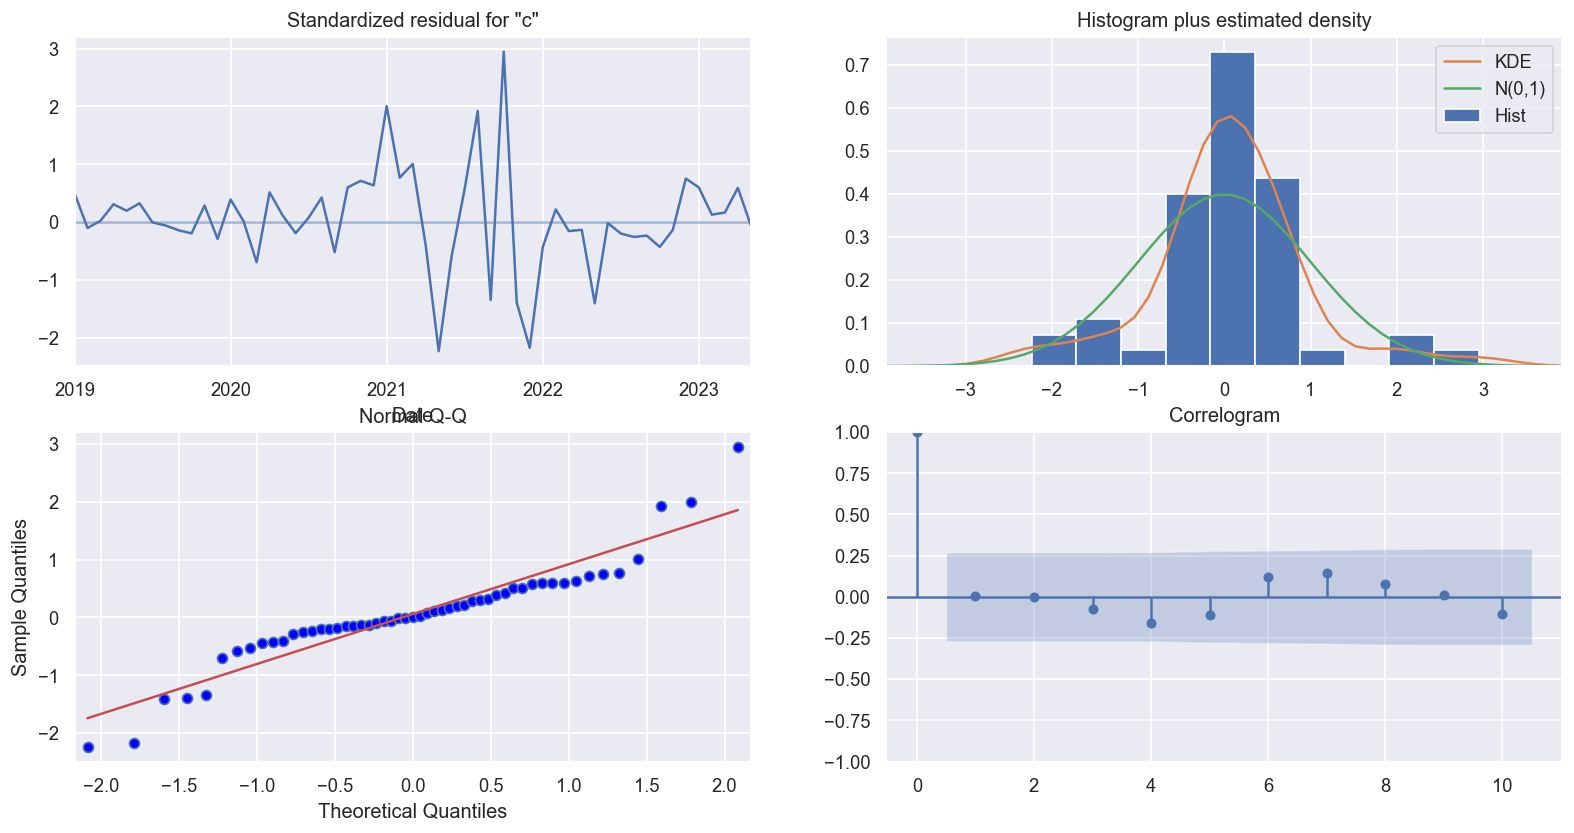

In [56]:
# ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:1052.2431059321195

SAR_4 = SARIMAX(close_mts,
              order=(1, 1, 2),
              seasonal_order=(1, 1, 3, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

# Fit the model
results = SAR_4.fit()

# Let's predict the model result SAR_4
pred_SAR_4 = results.predict(typ='levels')

# Check Root Mean Squared Error
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, pred_SAR_4)))

# Check Akaike Information Criteria
print('AIC SAR_1 model :', results.aic)

# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

RMSE Train error : 3368.34664379213
AIC SAR model    : 1073.7815701575475


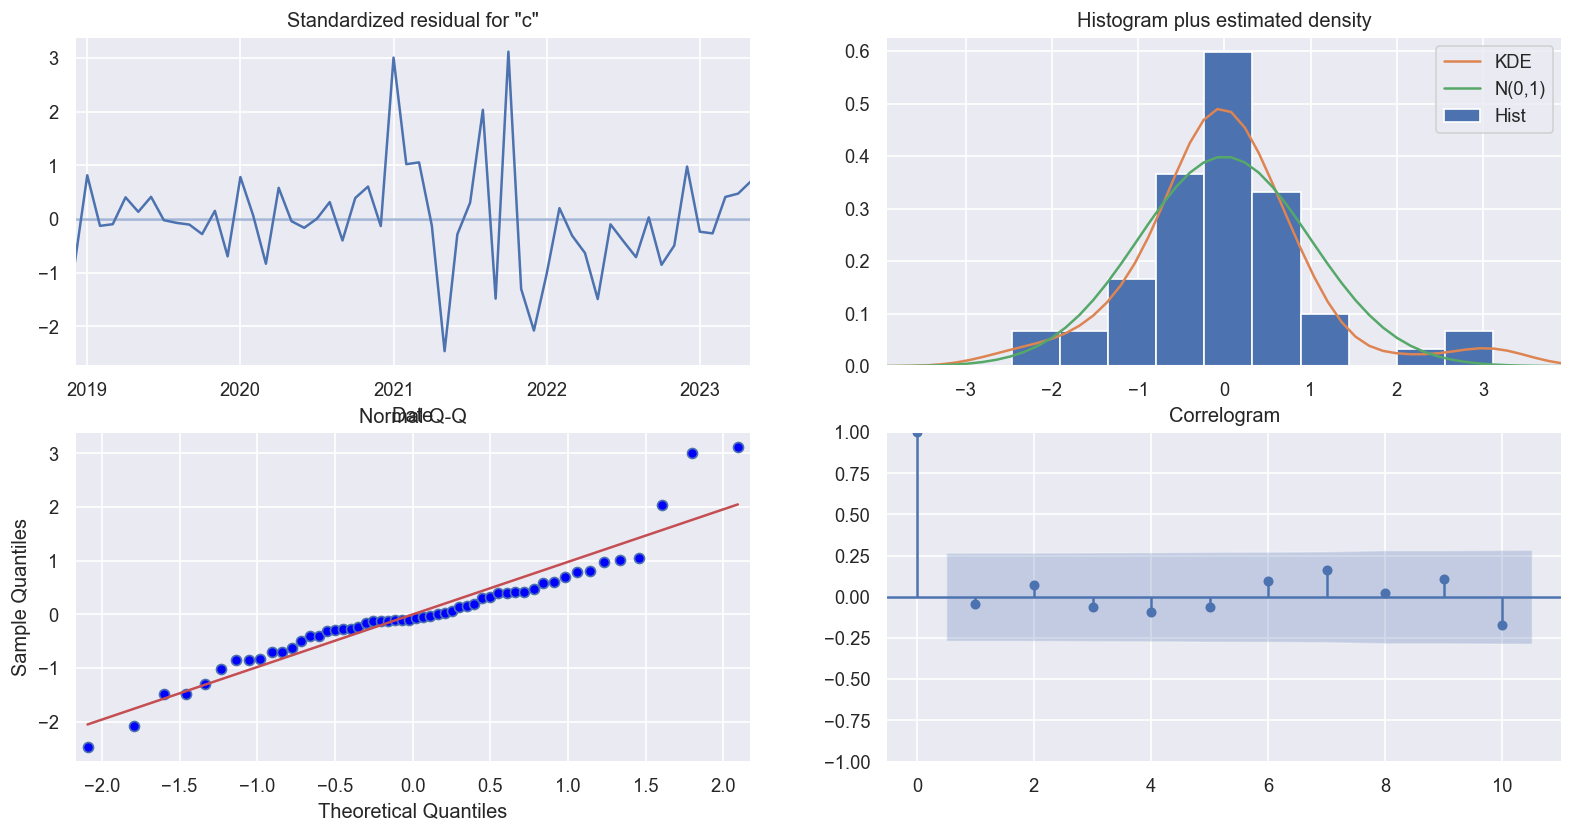

In [57]:
# ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:1073.7815701575475

SAR_5 = SARIMAX(close_mts,
              order=(2, 1, 0),
              seasonal_order=(2, 2, 1, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

# fit the model
results = SAR_5.fit()

# Let's predict model
pred_SAR_5 = results.predict(typ='levels')

# Check Root Mean Squared Error
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, pred_SAR_5)))

# Check Akaike Information Criteria
print('AIC SAR_5 model    :', results.aic)

# Check the prediction errors (residuals) against the predicted values 
# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.
results.plot_diagnostics(figsize=(16, 8))

#Save figure
plt.savefig("Diagnostic SAR_5 Model.png", transparent = True, dpi=150)

plt.show()


* The above diagnostic plot is not perfect, however, my model diagnostics suggest that the model residuals are almost close to normally distributed in comparison to the SAR_2, SAR_4.

* As seen on theoretical quantiles, majority points are sitting on the straight line.
* I can see almost bell curve on the histogram plus estimated density. 

# Validate Forecast

* To explore the accuracy of my forecasts, I will compare predicted BTC price to real BTC prices of the time series. 

* Then I will set forecasts to start 2022-01-31 to the end of the data

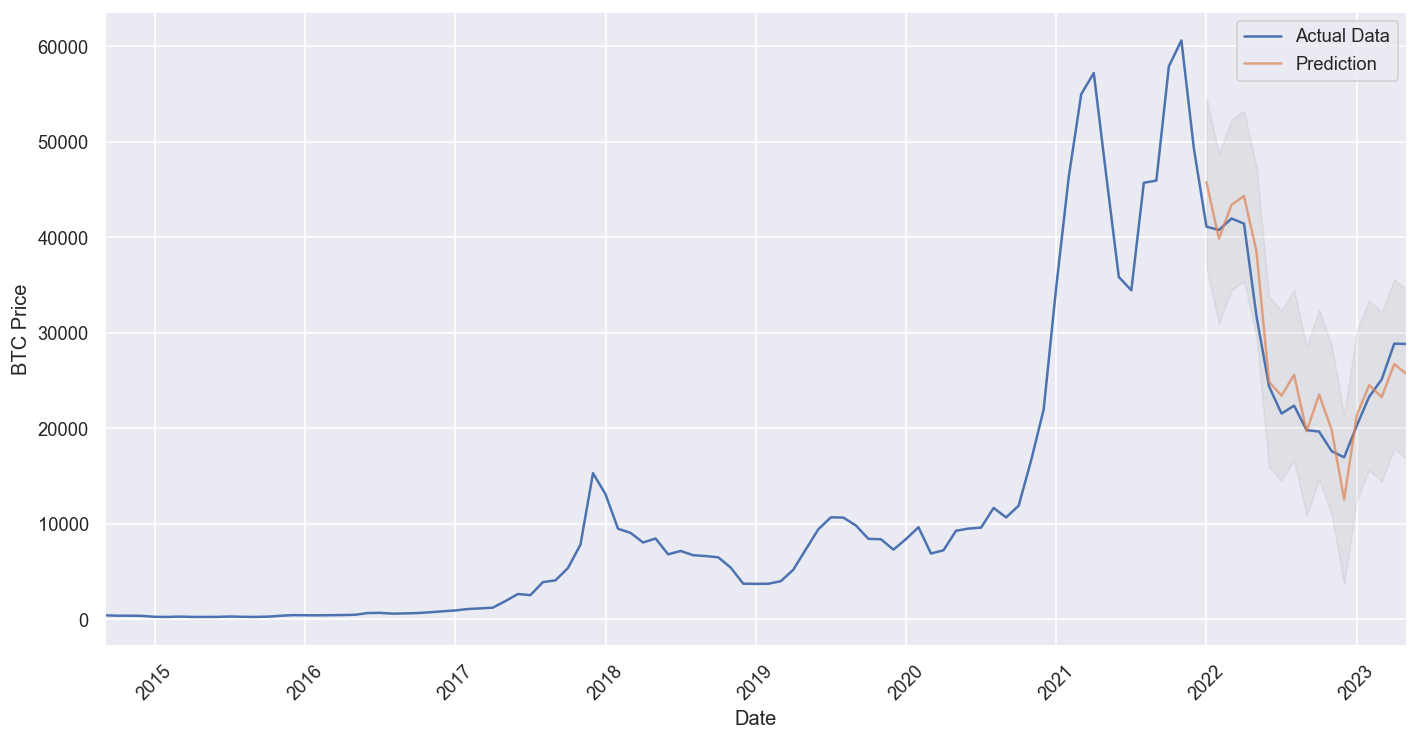

In [58]:
# Prediction after 2022-01-31
pred = results.get_prediction(start=pd.to_datetime('2022-01-31'), dynamic=False)

# Confidence Interval construction for the predicted mean 
pred_ci = pred.conf_int()

# Since 2014 I plot the actual data
ax = close_mts['2014-09-30':].plot(label='Actual Data')

# Forecasts a future output based on trends found through historical data
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)

ax.set_xlabel('Date')
ax.set_ylabel('BTC Price')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Prediction after 2022 BTC.png", transparent = True, dpi=150)
plt.legend()
plt.show()

* The above line graph displays that the Actual values is compared to the rolling forecast prediction.
* My forecast aligns with the actual values well. It shows a downward trend starts at the last of 2021, after 2023 it start to be upward.

In above graph, it is obviously seen the forecasting line is almost lying on the given values for this model. I don't even require the differencing method. Using this model now, I can predict the future values too

In [59]:
# Calculate the mean Squared Error 

close_mts_forecasted = pred.predicted_mean
close_mts_truth = close_mts['2014-09-30':]
mse = ((close_mts_forecasted - close_mts_truth) ** 2).mean()

# MSE is a measure of the quality of an estimator measures the average of the squares of the errors 
# The average squared difference between the estimated values and what is estimated
print('The Mean Squared Error of my forecasts      : {}'.format(round(mse, 2)))

# Root of Mean Squared Error
print('The Root Mean Squared Error of my validate forecasts : {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of my forecasts      : 9031024.88
The Root Mean Squared Error of my forecasts : 3005.17


# Visualize Forecast

## Final Model (SAR_5) Forecast


### 6 Months Forecast

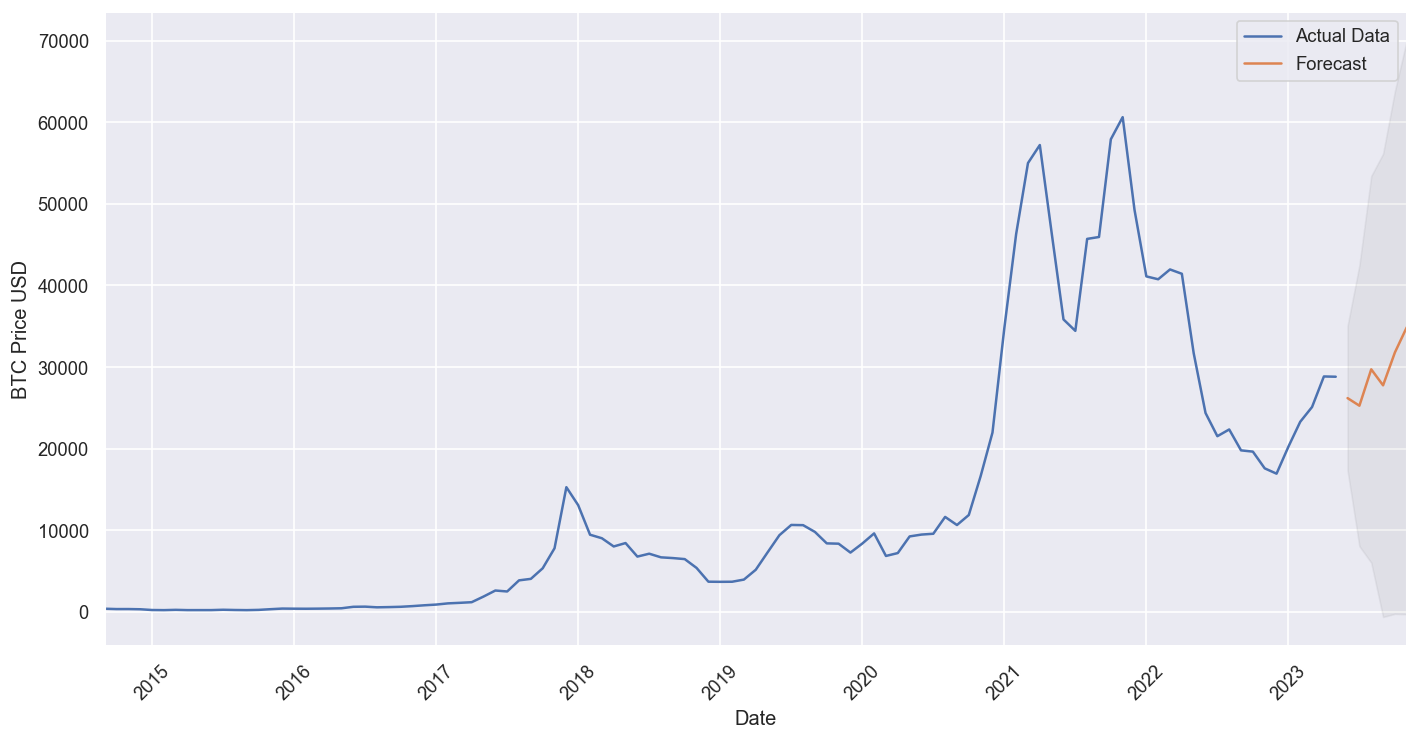

In [60]:
# 2023 prediction - 6 months later
pred_btc = results.get_forecast(steps=6)

# Confidence interval construction for the predicted mean 
pred_ci = pred_btc.conf_int()

# Since 2014 I plot the actual data
ax = close_mts.plot(label='Actual Data', figsize=(14, 7))

# Prediction mean from 2019 to the end of the data
pred_btc.predicted_mean.plot(ax=ax, label='Forecast')

# Generates a shaded region between a min and max boundary 
# It is useful for illustrating ranges
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price USD')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("6 Months Forecast BTC.png", transparent = True, dpi=150)

plt.legend()
plt.show()

### 1 Year Out Forecast

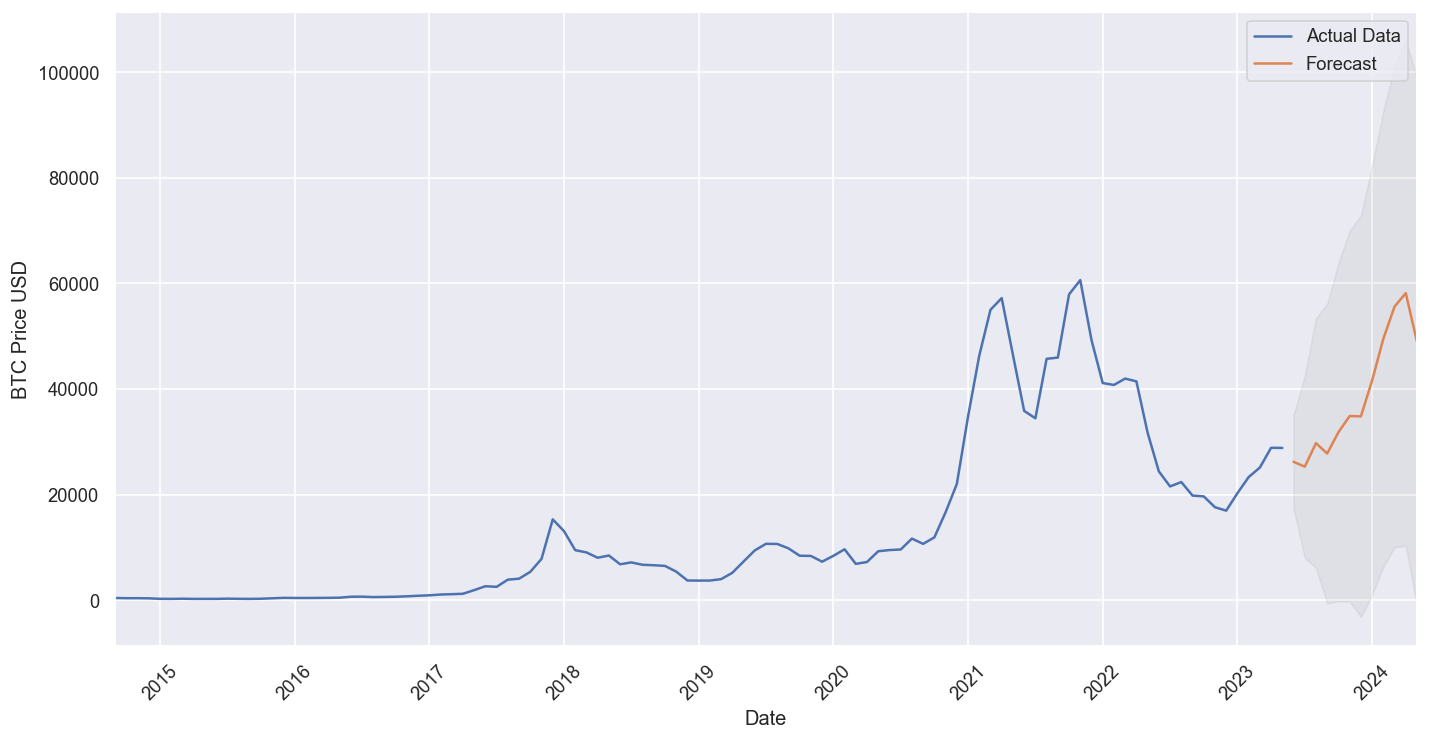

In [61]:
# 2024 prediction 
pred_btc = results.get_forecast(steps=12)

pred_ci = pred_btc.conf_int()
ax = close_mts.plot(label='Actual Data', figsize=(14, 7))

pred_btc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price USD')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Forecast 2024 BTC.png", transparent = True, dpi=150)

plt.legend()
plt.show()

### 3 Year Out Forecast

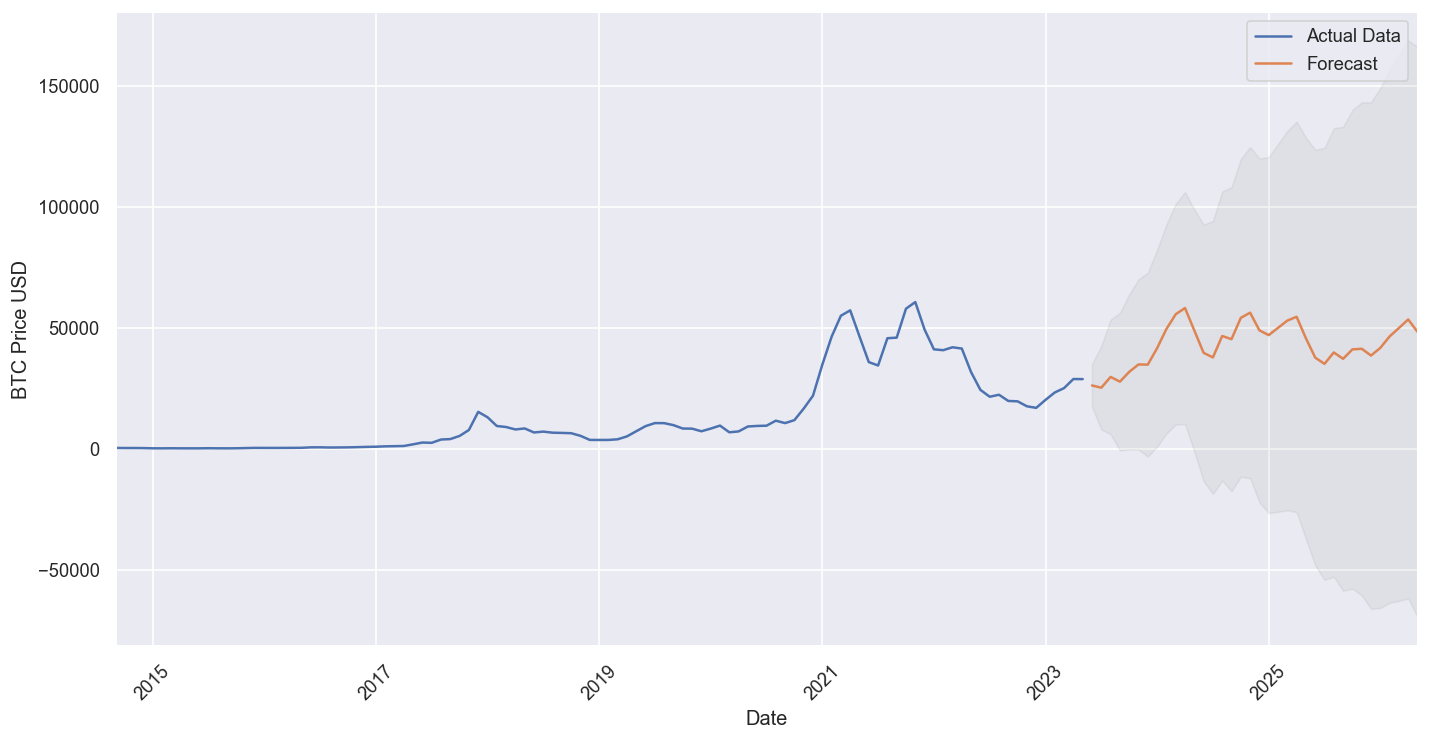

In [62]:
# 2025 forecast - 3 Yearly 

pred_btc = results.get_forecast(steps=36)

pred_ci = pred_btc.conf_int()
ax = close_mts.plot(label='Actual Data', figsize=(14, 7))
pred_btc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price USD')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Forecast 3 Yearly BTC.png", transparent = True, dpi=150)

plt.legend()
plt.show()

### 8 Year Out Forecast

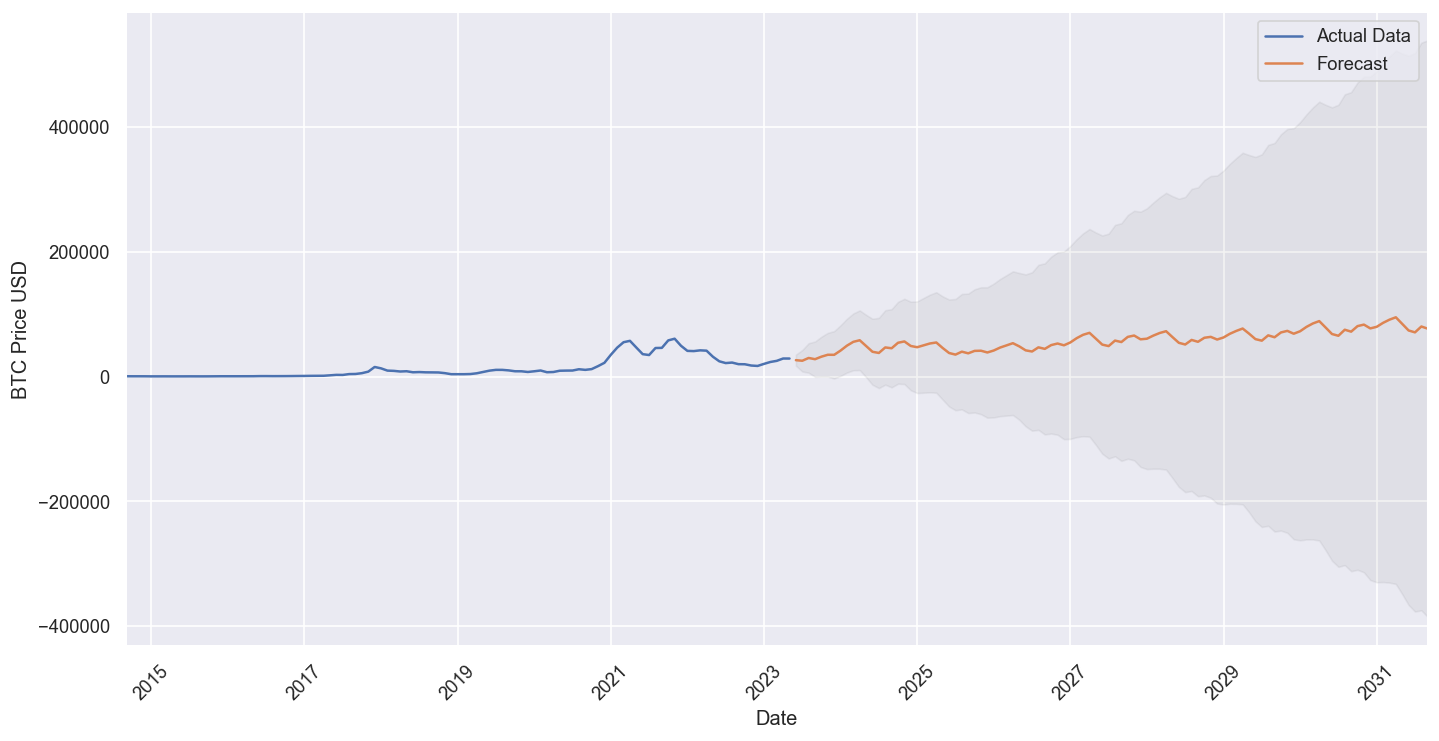

In [63]:
# 2031 prediction - 8 years prediction

pred_btc = results.get_forecast(steps=100)

pred_ci = pred_btc.conf_int()
ax = close_mts.plot(label='Actual Data', figsize=(14, 7))
pred_btc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price USD')

# Rotate the x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
plt.savefig("Forecast 8 Yearly BTC.png", transparent = True, dpi=150)
plt.legend()
plt.show()

# CONCLUSION

Time series generally focus on the prediction of real values, called regression problems. A high-quality forecast features the accurate, timely, clear & understandable, relevant specifications. Accurate is important, enough to get a good evaluation for determination about plans or how we can take a position. A good forecast gives the information when needed, so it is a timely result, gives idea when the situation will occur.
To evaluate the performance of all models I concern RMSE. Because RMSE is the most common metric used to measure the accuracy of a time-series forecasting model. RMSE is a good measure of how accurately the model predicts the response, and is the most important criterion for fit if the main purpose of the model is prediction. It is an absolute measure in the same scale as the target, more sensitive to outliers. It is calculated by taking the square root of the mean of the squared differences between the actual values and the predictions of the model. The RMSE both for training and test sets should be very similar to build a good model. If the RMSE for the test set is much higher than that of the training set, it is likely badly overfitting the data.
This can be calculated by using the sqrt() math function on the mean squared error calculated using the mean_squared_error() scikit-learn function.

* RMSE = sqrt(mean_squared_error(expected, predictions))

I report both the RMSE and AIC score in my project to compare and evaluate my models.It looks like very high as 3368 RMSE score. The weighted average error between the predictions and actuals in this dataset 3005, which is likely not bad value given that the average actual price in dataset is 3368. It is the most optimal score according to the diagnostic graphics and my dataset. My actual price tends to be over thousands dolars.



SAR_1 = ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0

> It is singular matrix result for SAR_1 model.

SAR_2 = ARIMA(3, 1, 2)x(2, 1, 2, 12)12 - AIC:253.00985753516215

> Diagnostic results display that there is no normality.

SAR_3 = ARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:1034.0861380207261

>  Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

SAR_4 = ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:1052.2431059321195

> The difference of RMSE train and test score is getting higher for SAR_2 and SAR_4 models.

SAR_5 = ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:1073.7815701575475 

> RMSE: 3368, Forecast RMSE: 3005 The best optimal and interpretable result belongs to SAR_5 model. It looks like very high as 3368 RMSE score. The weighted average error between the predictions and actuals in this dataset 3005, which is likely not bad value given that the average actual price in dataset is 3368. It is the most optimal score according to the diagnostic graphics and my dataset. My actual price tends to be over thousands dolars.

# FURTURE

This analysis is accomplished by time series method that the price is only based on change the price over time as mentioned above. Bitcoin acts as more of a commodity being used to store value, so we could concern other determiner factors as well for BTC prices.
•	The supply of Bitcoin and the market’s demand for it
•	The cost of producing a bitcoin through the mining process
•	The number of competing cryptocurrencies
•	Regulations governing its sale and use
•	Media and news


# EXTRA WORK GRID SEARCH 

I work on different terms, higher AR or MA terms

# DIFFERENCING =1, AR, MA TERM CHANGE


In [57]:
# Parameter combinations 
# I will focus on to use 'grid search' to find the optimal set of parameters 
# d = 1 will be standstill, p and q will change
p = q = range(2, 5)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], d, x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 1, 3) x (2, range(0, 3), 3, 12)
SARIMAX: (2, 1, 3) x (2, range(0, 3), 4, 12)
SARIMAX: (2, 1, 4) x (3, range(0, 3), 2, 12)
SARIMAX: (2, 1, 4) x (3, range(0, 3), 3, 12)


In [59]:
# Let's find the best AIC score and the most optimal parameter combination among them for the best performance model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(close_mts,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [75]:
#ARIMA(3, 1, 2)x(4, 1, 2, 12)12 - AIC:24.0
# ARIMA(2, 1, 4)x(2, 1, 4, 12)12 - AIC:794.4776912208251
# ARIMA(2, 1, 4)x(4, 1, 3, 12)12 - AIC:853.0639171284553

# Length of endogenous variable must be larger the the number of lags used in the model and 
# the number of observations burned in the log-likelihood calculation.


#ARIMA(4, 1, 4)x(2, 1, 3, 12)12 - AIC:1022.8755679622076
#ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:1035.6678795720345
# ARIMA(2, 1, 2)x(4, 1, 2, 12)12 - AIC:1432.1813212103316
# ARIMA(2, 1, 2)x(3, 1, 2, 12)12 - AIC:2429.8633192896996

SAR_3 = SARIMAX(close_mts,
              order=(4, 1, 4),
              seasonal_order=(2, 1, 3, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

results = SAR_3.fit()
print(results.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                      close   No. Observations:                  105
Model:             SARIMAX(4, 1, 4)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -497.438
Date:                                    Tue, 30 May 2023   AIC                           1022.876
Time:                                            11:16:09   BIC                           1049.921
Sample:                                        09-30-2014   HQIC                          1033.210
                                             - 05-31-2023                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8696      2.047      0.425      0

In [76]:
# Let's predict model
pred_SAR_3 = results.predict(typ='levels')
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, y_pred_SAR_3)))
print('AIC SAR model    :', results.aic)

# Check the prediction errors (residuals) against the predicted values 
# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

RMSE Train error : 3036.3235383029287
AIC SAR model    : 1022.8755679622076


ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1920x960 with 0 Axes>

In [80]:
# Calculate the mean Squared Error 

close_mts_forecasted = pred.predicted_mean
close_mts_truth = close_mts['2022-01-31':]
mse = ((close_mts_forecasted - close_mts_truth) ** 2).mean()

# MSE is a measure of the quality of an estimator measures the average of the squares of the errors 
# The average squared difference between the estimated values and what is estimated
print('The Mean Squared Error of my forecasts      : {}'.format(round(mse, 2)))

# Root of Mean Squared Error
print('The Root Mean Squared Error of my forecasts : {}'.format(round(np.sqrt(mse), 2)))

AttributeError: 'Series' object has no attribute 'predicted_mean'

In [66]:

# ARIMA(2, 1, 2)x(3, 1, 2, 12)12 - AIC:2429.8633192896996

SAR_4 = SARIMAX(close_mts,
              order=(2, 1, 2),
              seasonal_order=(3, 1, 2, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

results = SAR_4.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  105
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1204.932
Date:                            Tue, 30 May 2023   AIC                           2429.863
Time:                                    11:13:12   BIC                           2449.753
Sample:                                09-30-2014   HQIC                          2437.534
                                     - 05-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0534         -0       -inf      0.000       1.053       1.053
ar.L2         -0.4805         -0   

RMSE Train error : 3328.329906707296
AIC SAR_4 model    : 2429.8633192896996


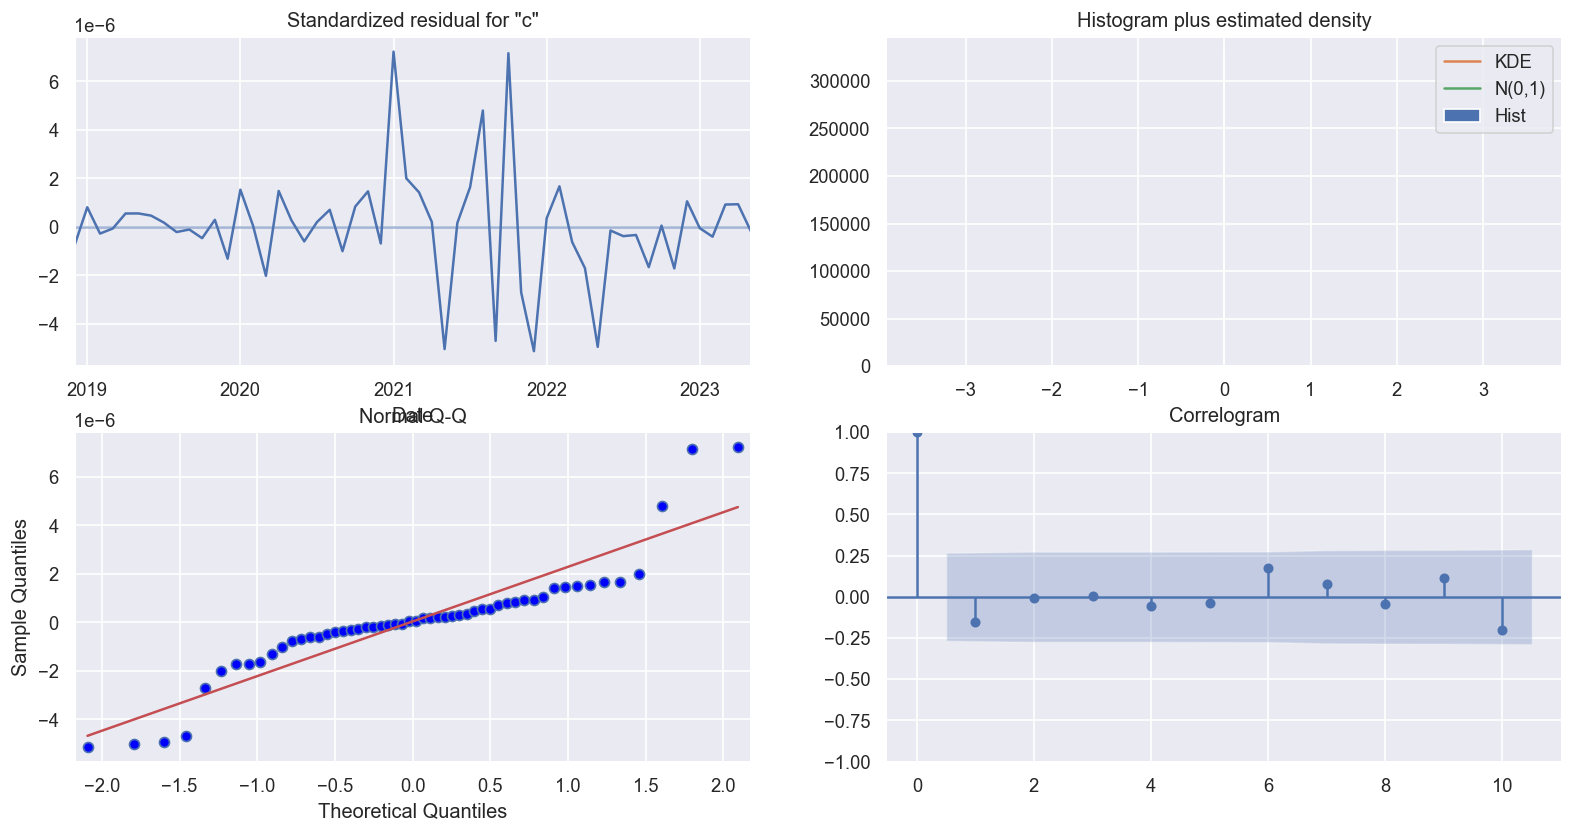

In [67]:
# Let's predict model
y_pred_SAR_4 = results.predict(typ='levels')
print('RMSE Train error :', np.sqrt(mean_squared_error(close_mts, y_pred_SAR_4)))
print('AIC SAR_4 model    :', results.aic)

# Check the prediction errors (residuals) against the predicted values 
# I should see if the prediction can be improved by fixing problems in my data thanks to the diagnostic plot.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [68]:
# Calculate the mean Squared Error 

close_mts_forecasted = pred.predicted_mean
close_mts_truth = close_mts['2022-01-31':]
mse = ((close_mts_forecasted - close_mts_truth) ** 2).mean()

# MSE is a measure of the quality of an estimator measures the average of the squares of the errors 
# The average squared difference between the estimated values and what is estimated
print('The Mean Squared Error of my forecasts      : {}'.format(round(mse, 2)))

# Root of Mean Squared Error
print('The Root Mean Squared Error of my forecasts : {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of my forecasts      : 13503078.5
The Root Mean Squared Error of my forecasts : 3674.65


# DIFFERENCING =1, AR, MA TERM CHANGE

In [64]:
# Parameter combinations 
# We will focus on to use 'grid search' to find the optimal set of parameters 
p = q = range(0, 3)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


In [65]:
# Let's find the best AIC score and the mosrt optimal parameter combination among them for the best performance model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(close_mts,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1828.9518134019052
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1548.7288070841078
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:4492.250832038787
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1590.0724933767935
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1550.1196087274618
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:2609.9678981864254
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1352.3507049594314
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1352.8613962971076
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:3695.5882798396597
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1774.7490570343855
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1508.110007560543
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:3823.042338244733
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1566.7096554952575
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1510.1090594876027
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:5400.779077206121
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1334.9513934229446
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1335.558200536252
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:3232.52348490914